In [ ]:
### StockTrading.ipynb by Kyle Drury
### A python script for tracking share prices and fluctuations in real time, and carrying out comparisons between data

In [2]:
# Import installed packages

import requests as req
from bs4 import BeautifulSoup as soup
import selenium as sel
from lxml import etree
from selenium import webdriver
from selenium.webdriver.common.by import By
import csv
import matplotlib.pyplot as plt

In [3]:
### Define a function to easy call to get all data from a link

def parse(link, company, dataFile):

    url = link
    driver = webdriver.Chrome()  # Open Chrome Browser
    driver.get(url)  # Webpage URL

    price_element = driver.find_element(By.CSS_SELECTOR, '#quote-header-info > div.My\(6px\).Pos\(r\).smartphone_Mt\(6px\).W\(100\%\) > div.D\(ib\).Va\(m\).Maw\(65\%\).Ov\(h\) > div.D\(ib\).Mend\(20px\) > fin-streamer.Fw\(b\).Fz\(36px\).Mb\(-4px\).D\(ib\)')
    price = price_element.text
    price = price.replace(',', '')
    print(company, 'price:', price)   # share price

    delta_element = driver.find_element(By.CSS_SELECTOR, '#quote-header-info > div.My\(6px\).Pos\(r\).smartphone_Mt\(6px\).W\(100\%\) > div.D\(ib\).Va\(m\).Maw\(65\%\).Ov\(h\) > div > fin-streamer:nth-child(2)')
    delta = delta_element.text
    print(company, 'delta:', delta)   # price change

    percent_element = driver.find_element(By.CSS_SELECTOR, '#quote-header-info > div.My\(6px\).Pos\(r\).smartphone_Mt\(6px\).W\(100\%\) > div.D\(ib\).Va\(m\).Maw\(65\%\).Ov\(h\) > div.D\(ib\).Mend\(20px\) > fin-streamer:nth-child(3)')
    percent = percent_element.text[1:6]
    percent = percent.strip('%')

    print(company, 'percent:', percent)   # percent change

    with open(dataFile, 'a', newline='') as file:   # Write the day, price, delta, and percent to csv
        writer = csv.writer(file)
        writer.writerow([day, price, delta, percent])

    driver.quit() # Quit chrome so that a million Chrome browsers don't open
    print('--------------------')  # Print divider to break up print statements


In [4]:
### Define a function to make arrays for price, delta, and percent for each csv

def makeArray(file, df):

    df[0].clear()
    df[1].clear()
    df[2].clear()
    df[3].clear()

    with open(file, 'r') as file:
        reader = csv.reader(file)

        next(reader)

        for row in reader:

            for i, value in enumerate(row):
                df[i].append(float(value))

    return df

df = [ [], [], [], [] ]   # a 4xX array. Each entry is an array that makes up all the values for day, price, delta, and percent

In [5]:
### Define a function that can turn the df into 3 plots for price, delta, and percent with adjustable axes

labels1 = ['Share Price ($)', 'Price Change ($)', 'Price Change (%)']
labels2 = ['Volume', 'Avg Volume', 'Market Cap']

def setup():
    fig, ax = plt.subplots()
    plt.grid(True, which='both', axis='y')
    plt.grid(True, which='both', axis='x')
    plt.xlabel('Day')

def plot (datafile, company, lower, upper, pricelower, priceupper, labels):

    setup()

    if pricelower == 0:
        min, max = 0, 0

    else:
        min, max = pricelower, priceupper

    plt.xlim(0, day)
    plt.ylabel(labels[0])

    if labels == labels2:
        ax.set_yscale('log')


    for i in range(len(datafile)):
        DataFrame = makeArray(datafile[i], df)
        plt.plot(DataFrame[0], DataFrame[1], label=company[i])

        if pricelower == 0:
            for j in range(len(DataFrame[0])):
                if DataFrame[1][j] < min:
                    min = DataFrame[1][j]
                if DataFrame[1][j] > max:
                    max = DataFrame[1][j]

    plt.ylim(min, max)
    plt.legend(loc='lower left')
    plt.show()
    plt.clf()


    setup()
    min, max = 0, 0
    plt.xlim(0, day)
    plt.ylabel(labels[1])
    if labels == labels2:
        ax.set_yscale('log')

    for i in range(len(datafile)):
        DataFrame = makeArray(datafile[i], df)
        plt.plot(DataFrame[0], DataFrame[2], label=company[i])

        for j in range(len(DataFrame[0])):
            if DataFrame[2][j] < min:
                min = DataFrame[2][j]
            if DataFrame[2][j] > max:
                max = DataFrame[2][j]

    plt.ylim(min, max)
    plt.legend(loc='lower left')
    plt.show()
    plt.clf()


    setup()
    min, max = 0, 0
    plt.xlim(0, day)
    plt.ylabel(labels[2])
    if labels == labels2:
        ax.set_yscale('log')

    for i in range(len(datafile)):
        DataFrame = makeArray(datafile[i], df)
        plt.plot(DataFrame[0], DataFrame[3], label=company[i])

        for j in range(len(DataFrame[0])):
            if DataFrame[3][j] < min:
                min = DataFrame[3][j]
            if DataFrame[3][j] > max:
                max = DataFrame[3][j]

    plt.ylim(min, max)
    plt.legend(loc='lower left')
    plt.show()
    plt.clf()

In [6]:
# Day header: Day 0 = 2023/06/30

day = 10
days = []    # Days array

for i in range(day+1):
    days.append(i)        # Get an array of days from 0 to (day)

Raytheon Tech price: 96.17
Raytheon Tech delta: -1.00
Raytheon Tech percent: -1.03
--------------------
General Dynamics price: 215.32
General Dynamics delta: -1.64
General Dynamics percent: -0.76
--------------------
Airbus price: 133.02
Airbus delta: -1.58
Airbus percent: -1.17
--------------------
BAE Systems price: 917.80
BAE Systems delta: +4.80
BAE Systems percent: +0.53
--------------------
Northrop Grumman price: 450.64
Northrop Grumman delta: -6.39
Northrop Grumman percent: -1.40
--------------------
Lockheed Martin price: 464.31
Lockheed Martin delta: -2.07
Lockheed Martin percent: -0.44
--------------------
Boeing price: 213.12
Boeing delta: -3.73
Boeing percent: -1.72
--------------------


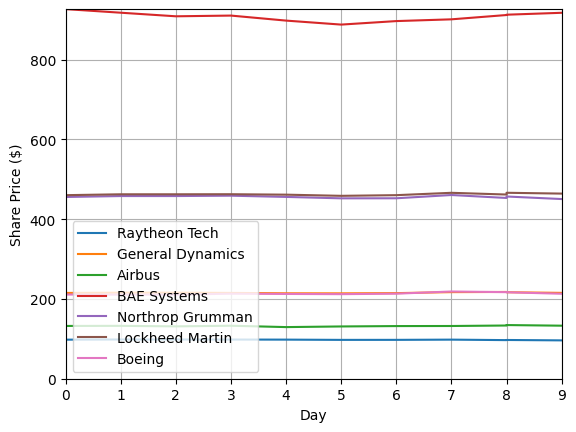

<Figure size 640x480 with 0 Axes>

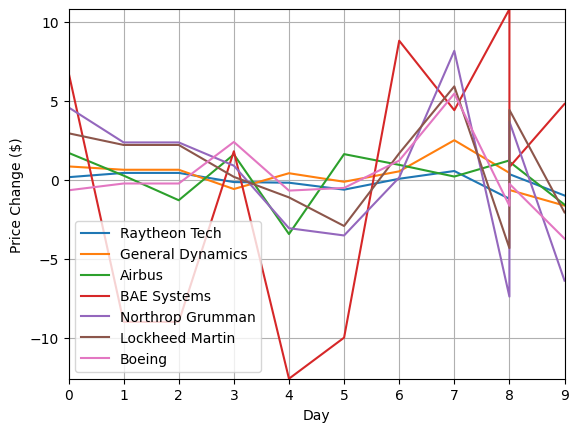

<Figure size 640x480 with 0 Axes>

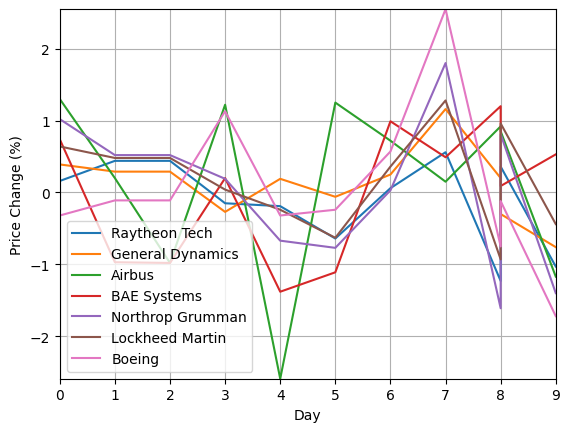

<Figure size 640x480 with 0 Axes>

In [6]:
### AEROSPACE & DEFENSE ###

AAprices, AAdeltas, AApercents = [], [], []

AAlinks = ['https://ca.finance.yahoo.com/quote/RTX?p=RTX&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/GD?p=GD&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/AIR.PA?p=AIR.PA&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/BA.L?p=BA.L&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/NOC?p=NOC&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/LMT?p=LMT&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/BA?p=BA&.tsrc=fin-srch']

AAcompanies = ['Raytheon Tech', 'General Dynamics', 'Airbus', 'BAE Systems', 'Northrop Grumman', 'Lockheed Martin', 'Boeing']

AAdataFiles = ['./AA/RTX_data.csv', './AA/GD_data.csv', './AA/AIR_data.csv', './AA/BAE_data.csv', './AA/NOC_data.csv', './AA/LMT_data.csv', './AA/BA_data.csv']

for i in range(len(AAlinks)):
    parse(AAlinks[i], AAcompanies[i], AAdataFiles[i])

plot(AAdataFiles, AAcompanies, 0, day, 0, 0, labels1)

BMW price: 106.76
BMW delta: -0.24
BMW percent: -0.22
--------------------
Volkswagen price: 168.75
Volkswagen delta: -5.25
Volkswagen percent: -3.02
--------------------
Toyota price: 159.15
Toyota delta: -1.20
Toyota percent: -0.75
--------------------
Tesla price: 281.38
Tesla delta: +3.48
Tesla percent: +1.25
--------------------
Ford price: 14.98
Ford delta: -0.21
Ford percent: -1.38
--------------------
NIO price: 10.54
NIO delta: -0.22
NIO percent: -2.04
--------------------
Nissan price: 8.02
Nissan delta: -0.22
Nissan percent: -2.63
--------------------
GM price: 40.00
GM delta: -0.50
GM percent: -1.23
--------------------


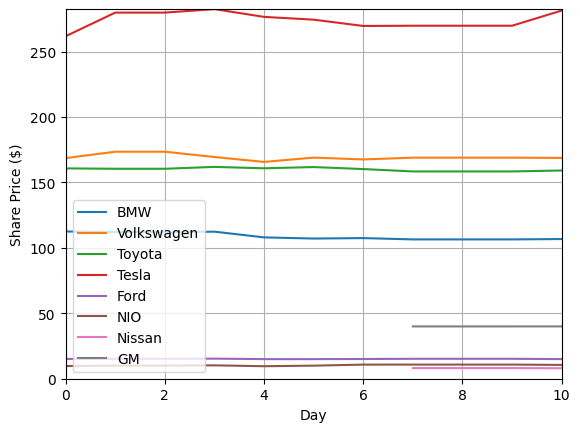

<Figure size 640x480 with 0 Axes>

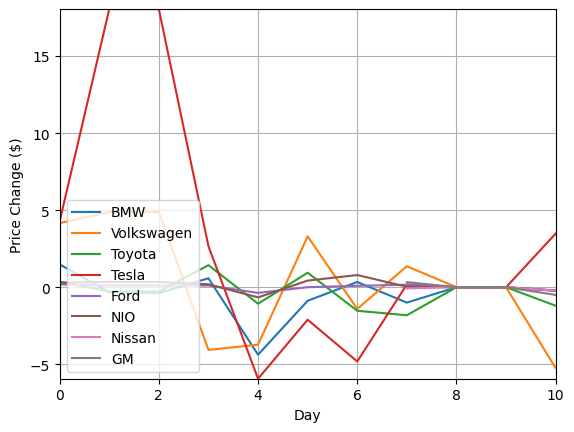

<Figure size 640x480 with 0 Axes>

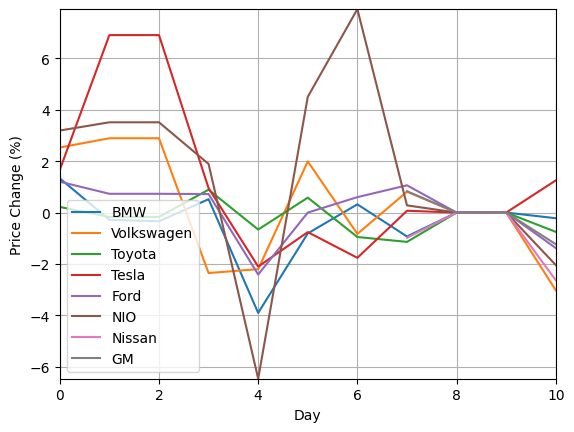

<Figure size 640x480 with 0 Axes>

In [8]:
### AUTOMOTIVE INDUSTRY & EVs ###

autoLinks = ['https://ca.finance.yahoo.com/quote/BMW.DE?p=BMW.DE&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/VLKAF?p=VLKAF.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/TM?p=TM&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/TSLA?p=TSLA&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/F?p=F&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/NIO?p=NIO&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/NSANY?p=NSANY&.tsrc=fin-srch','https://ca.finance.yahoo.com/quote/GM?p=GM&.tsrc=fin-srch']

autoCompanies = ['BMW', 'Volkswagen', 'Toyota', 'Tesla', 'Ford', 'NIO', 'Nissan', 'GM']

autoDataFiles = ['./Auto/BMW_data.csv', './Auto/VLKAF_data.csv', './Auto/TM_data.csv', './Auto/TSLA_data.csv', \
                 './Auto/F_data.csv', './Auto/NIO_data.csv', './Auto/NSANY_data.csv', './Auto/GM_data.csv']

for i in range(len(autoLinks)):
    parse(autoLinks[i], autoCompanies[i], autoDataFiles[i])

plot(autoDataFiles, autoCompanies, 0, day, 0, 0, labels1)

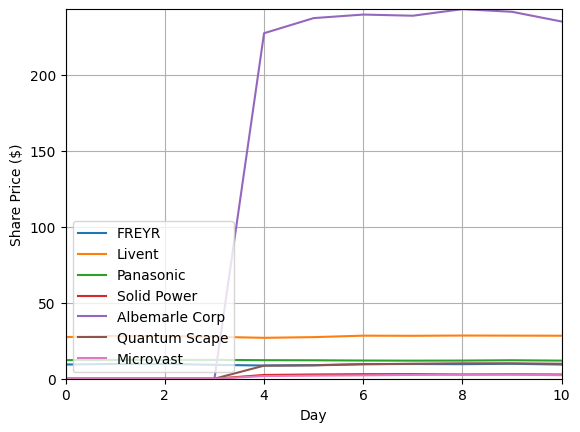

<Figure size 640x480 with 0 Axes>

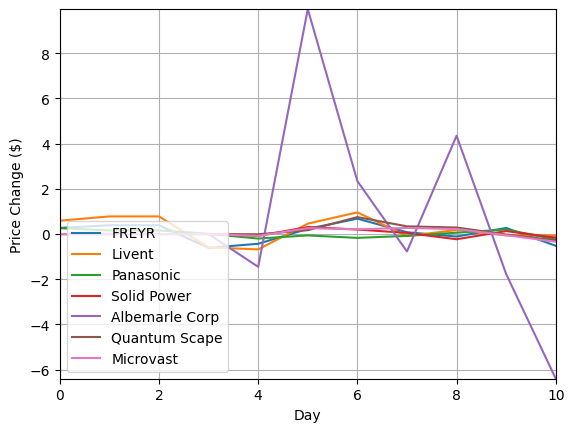

<Figure size 640x480 with 0 Axes>

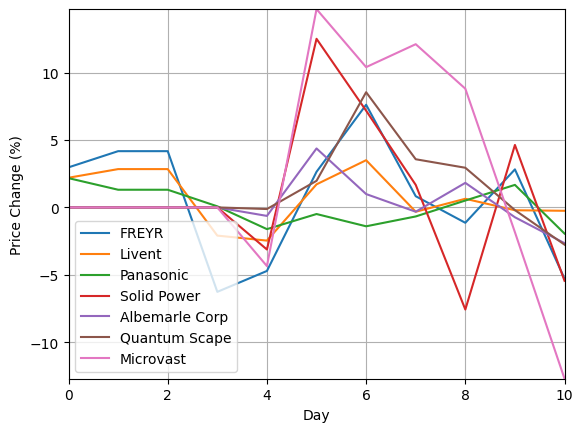

<Figure size 640x480 with 0 Axes>

In [9]:
### BATTERY PRODUCERS ###

batLinks = ['https://ca.finance.yahoo.com/quote/FREY?p=FREY&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/LTHM?p=LTHM&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/PCRFY?p=PCRFY&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/SLDP?p=SLDP&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/ALB?p=ALB&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/QS?p=QS&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/MVST?p=MVST&.tsrc=fin-srch']

batCompanies = ['FREYR', 'Livent', 'Panasonic', 'Solid Power', 'Albemarle Corp', 'Quantum Scape', 'Microvast']

batDataFiles = ['./BAT/FREYR_data.csv', './BAT/LTHM_data.csv', './BAT/PCRFY_data.csv', './BAT/SLDP_data.csv', './BAT/ALB_data.csv', './BAT/QS_data.csv', './BAT/MVST_data.csv']

for i in range(len(batLinks)):
    parse(batLinks[i], batCompanies[i], batDataFiles[i])

plot(batDataFiles, batCompanies, 0, day, 0, 0, labels1)

Snowflake price: 180.79
Snowflake delta: -3.43
Snowflake percent: -1.86
--------------------
ServiceNow price: 580.38
ServiceNow delta: +2.93
ServiceNow percent: +0.51
--------------------
Veeva Systems price: 208.69
Veeva Systems delta: -0.06
Veeva Systems percent: -0.03
--------------------
Lam Research price: 638.56
Lam Research delta: +0.26
Lam Research percent: +0.04
--------------------


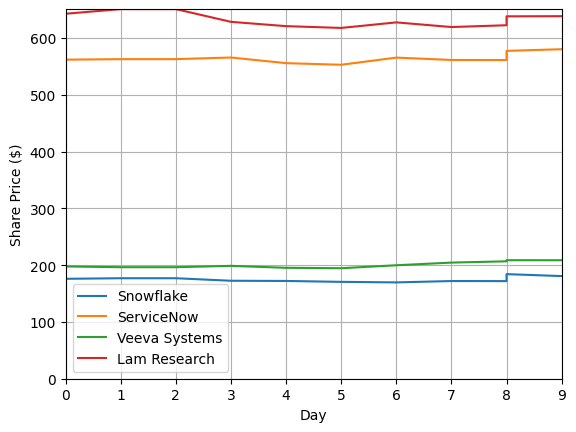

<Figure size 640x480 with 0 Axes>

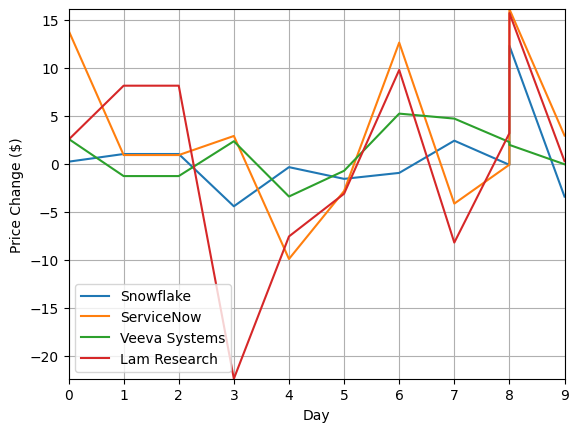

<Figure size 640x480 with 0 Axes>

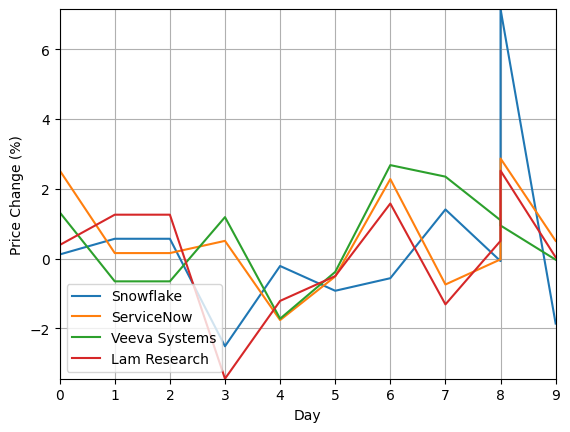

<Figure size 640x480 with 0 Axes>

In [9]:
### CLOUD COMPUTING ###

CClinks = ['https://ca.finance.yahoo.com/quote/SNOW?p=SNOW&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/NOW?p=NOW&.tsrc=fin-srch', \
           'https://ca.finance.yahoo.com/quote/VEEV?p=VEEV&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/LRCX?p=LRCX&.tsrc=fin-srch']

CCcompanies = ['Snowflake', 'ServiceNow', 'Veeva Systems', 'Lam Research']

CCdataFiles = ['./CC/SNOW_data.csv', './CC/NOW_data.csv', './CC/VEEV_data.csv', './CC/LRCX_data.csv']

for i in range(len(CClinks)):
    parse(CClinks[i], CCcompanies[i], CCdataFiles[i])

plot(CCdataFiles, CCcompanies, 0, day, 0, 0, labels1)

Editas price: 8.61
Editas delta: -0.34
Editas percent: -3.80
--------------------
Intellia price: 43.96
Intellia delta: -1.82
Intellia percent: -3.98
--------------------
CRISPR price: 56.91
CRISPR delta: -2.09
CRISPR percent: -3.54
--------------------
Arrowhead price: 34.60
Arrowhead delta: +0.11
Arrowhead percent: +0.32
--------------------


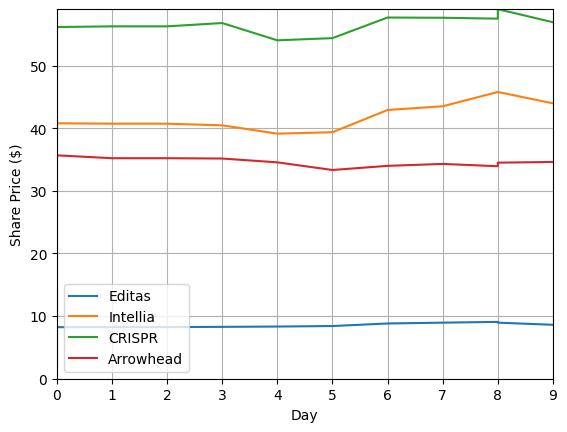

<Figure size 640x480 with 0 Axes>

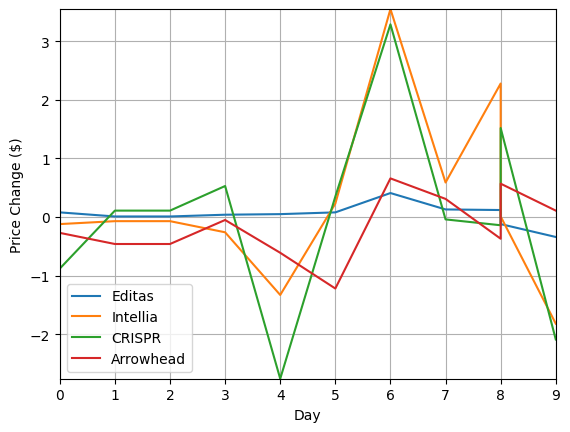

<Figure size 640x480 with 0 Axes>

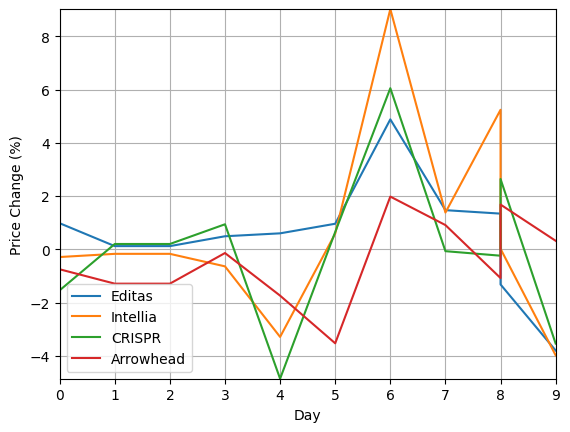

<Figure size 640x480 with 0 Axes>

In [10]:
### CRISPR & GENOME ENGINEERING ###

CRISPlinks = ['https://ca.finance.yahoo.com/quote/EDIT?p=EDIT&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/NTLA?p=NTLA&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/CRSP?p=CRSP&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/ARWR?p=ARWR&.tsrc=fin-srch']

CRISPcompanies = ['Editas', 'Intellia', 'CRISPR', 'Arrowhead']

CRISPdataFiles = ['./CRISPR/EDIT_data.csv', './CRISPR/NTLA_data.csv', './CRISPR/CRSP_data.csv', './CRISPR/ARWR_data.csv']

for i in range(len(CRISPlinks)):
    parse(CRISPlinks[i], CRISPcompanies[i], CRISPdataFiles[i])

plot(CRISPdataFiles, CRISPcompanies, 0, day, 0, 0, labels1)

Zscalar price: 145.43
Zscalar delta: +0.29
Zscalar percent: +0.20
--------------------
Crowdstrike price: 149.40
Crowdstrike delta: -1.35
Crowdstrike percent: -0.90
--------------------
Cloudflare price: 66.54
Cloudflare delta: -1.08
Cloudflare percent: -1.60
--------------------
Fortinet price: 78.92
Fortinet delta: +0.67
Fortinet percent: +0.86
--------------------
Accenture price: 315.77
Accenture delta: +0.56
Accenture percent: +0.18
--------------------


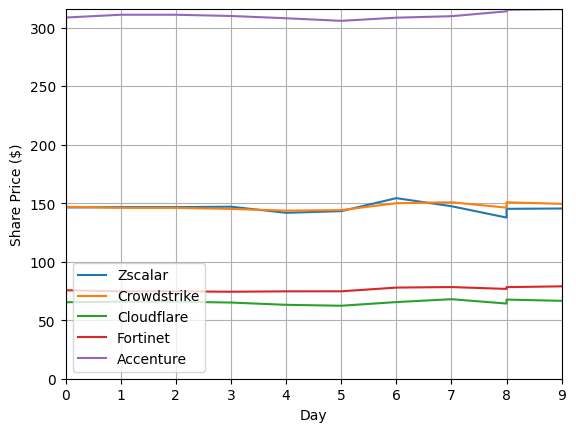

<Figure size 640x480 with 0 Axes>

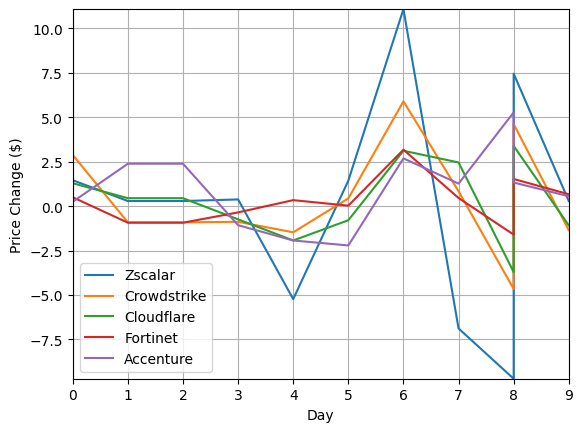

<Figure size 640x480 with 0 Axes>

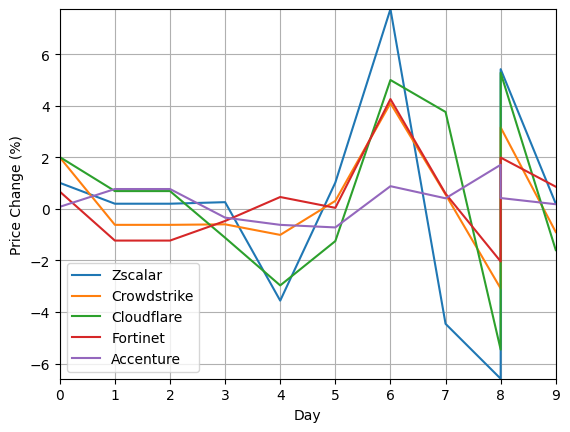

<Figure size 640x480 with 0 Axes>

In [11]:
### CYBERSECURITY ###

CSlinks = ['https://ca.finance.yahoo.com/quote/ZS?p=ZS&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/CRWD?p=CRWD&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/NET?p=NET&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/FTNT?p=FTNT&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/ACN?p=ACN&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/OKTA?p=OKTA&.tsrc=fin-srch']

CScompanies = ['Zscalar', 'Crowdstrike', 'Cloudflare', 'Fortinet', 'Accenture', 'Okta']

CSdataFiles = ['./CS/ZS_data.csv', './CS/CRWD_data.csv', './CS/NET_data.csv', './CS/FTNT_data.csv', './CS/ACN_data.csv', './CS/OKTA_data.csv']

for i in range(len(CSlinks)):
    parse(CSlinks[i], CScompanies[i], CSdataFiles[i])

plot(CSdataFiles, CScompanies, 0, day, 0, 0, labels1)

Trade Desk price: 88.00
Trade Desk delta: +0.99
Trade Desk percent: +1.14
--------------------
Fair Isaac price: 824.45
Fair Isaac delta: +13.65
Fair Isaac percent: +1.68
--------------------
Asana price: 23.02
Asana delta: -0.75
Asana percent: -3.16
--------------------
SOFI price: 9.08
SOFI delta: -0.08
SOFI percent: -0.87
--------------------
Affirm price: 16.39
Affirm delta: -1.06
Affirm percent: -6.07
--------------------
MasterCard price: 402.51
MasterCard delta: +1.95
MasterCard percent: +0.49
--------------------
Paycom price: 355.01
Paycom delta: +5.36
Paycom percent: +1.53
--------------------
Upstart price: 46.53
Upstart delta: -0.87
Upstart percent: -1.84
--------------------
PayPal price: 72.10
PayPal delta: -0.29
PayPal percent: -0.40
--------------------
Masimo price: 149.57
Masimo delta: +2.28
Masimo percent: +1.55
--------------------
Coinbase price: 105.31
Coinbase delta: -1.69
Coinbase percent: -1.58
--------------------


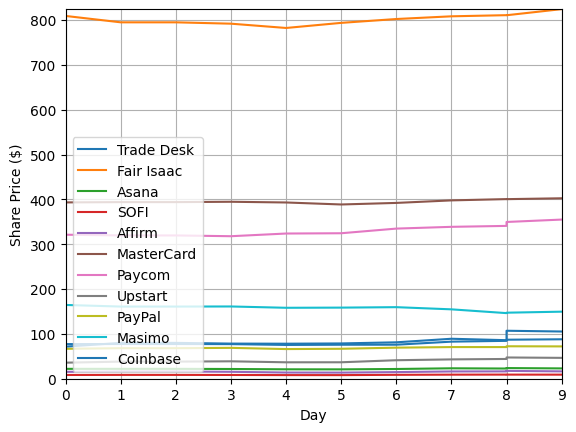

<Figure size 640x480 with 0 Axes>

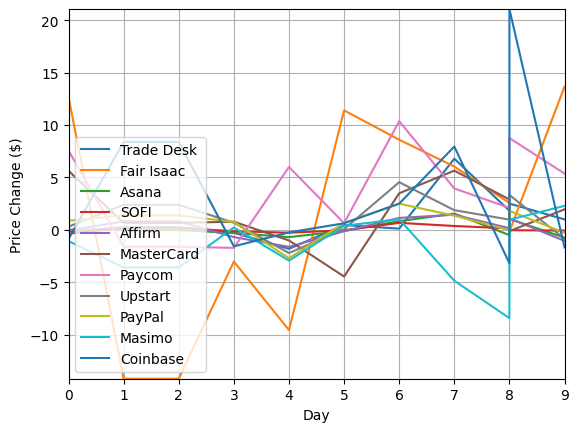

<Figure size 640x480 with 0 Axes>

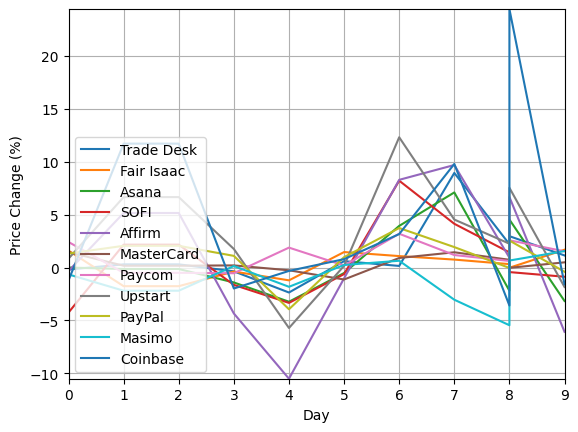

<Figure size 640x480 with 0 Axes>

In [12]:
### FINANCIAL SERVICES & TECH ###

FSTlinks = ['https://ca.finance.yahoo.com/quote/TTD?p=TTD&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/FICO?p=FICO&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/ASAN?p=ASAN&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/SOFI?p=SOFI&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/AFRM?p=AFRM&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/MA?p=MA&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/PAYC?p=PAYC&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/UPST?p=UPST&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/PYPL?p=PYPL&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/MASI?p=MASI&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/COIN?p=COIN&.tsrc=fin-srch']

FSTcompanies = ['Trade Desk', 'Fair Isaac', 'Asana', 'SOFI', 'Affirm', 'MasterCard', 'Paycom', 'Upstart', 'PayPal', 'Masimo', 'Coinbase']

FSTdataFiles = ['./FST/TTD_data.csv', './FST/FICO_data.csv', './FST/ASAN_data.csv', './FST/SOFI_data.csv', './FST/AFRM_data.csv', './FST/MA_data.csv', './FST/PAYC_data.csv', './FST/UPST_data.csv', './FST/PYPL_data.csv', './FST/MASI_data.csv', './FST/COIN_data.csv']

for i in range(len(FSTlinks)):
    parse(FSTlinks[i], FSTcompanies[i], FSTdataFiles[i])

plot(FSTdataFiles, FSTcompanies, 0, day, 0, 0, labels1)

Blackrock price: 728.03
Blackrock delta: -11.77
Blackrock percent: -1.59
--------------------
JPMorgan price: 149.77
JPMorgan delta: +0.90
JPMorgan percent: +0.60
--------------------


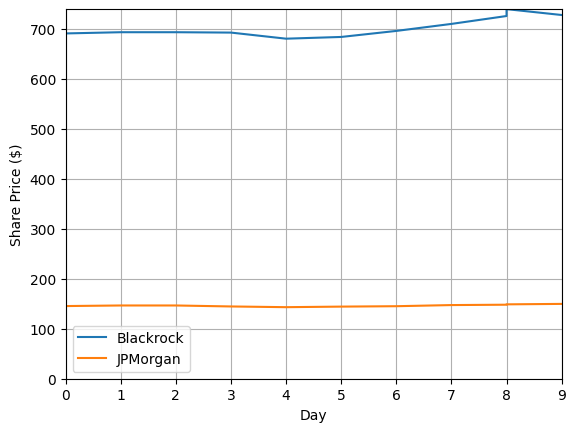

<Figure size 640x480 with 0 Axes>

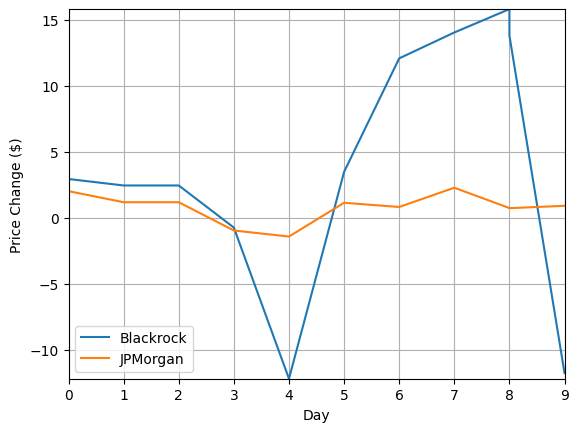

<Figure size 640x480 with 0 Axes>

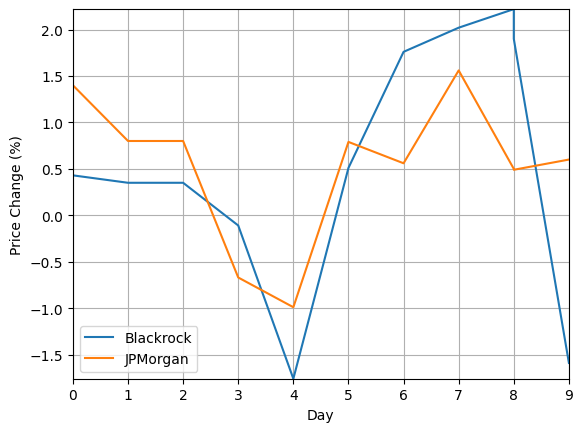

<Figure size 640x480 with 0 Axes>

In [13]:
### INVESTORS ###

INVlinks = ['https://ca.finance.yahoo.com/quote/BLK?p=BLK&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/JPM?p=JPM&.tsrc=fin-srch']

INVcompanies = ['Blackrock', 'JPMorgan']

INVdataFiles = ['./INV/BLK_data.csv', './INV/JPM_data.csv']

for i in range(len(INVlinks)):
    parse(INVlinks[i], INVcompanies[i], INVdataFiles[i])

plot(INVdataFiles, INVcompanies, 0, day, 0, 0, labels1)

In [14]:
### LEGAL SERVICES & LAW ###

parse('https://ca.finance.yahoo.com/quote/KNSL?p=KNSL&.tsrc=fin-srch', 'Kinsale', './LL/KNSL_data.csv')
makeArray('./LL/KNSL_data.csv', df)

Kinsale price: 367.16
Kinsale delta: +4.79
Kinsale percent: +1.32
--------------------


[[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 8.0, 9.0],
 [374.2,
  369.67,
  369.67,
  368.46,
  368.88,
  367.66,
  367.02,
  371.74,
  364.51,
  362.37,
  367.16],
 [2.23, -4.53, -4.53, -1.21, 0.42, -1.22, -0.64, 4.72, -7.23, -2.14, 4.79],
 [0.6, -1.21, -1.21, -0.33, 0.11, -0.33, -0.17, 1.29, -1.94, -0.59, 1.32]]

Ivanhoe price: 12.70
Ivanhoe delta: -0.06
Ivanhoe percent: -0.47
--------------------
Anglo American price: 8.41
Anglo American delta: -0.16
Anglo American percent: -1.87
--------------------
Vale price: 14.29
Vale delta: -0.05
Vale percent: -0.35
--------------------
Glencore price: 12.15
Glencore delta: -0.13
Glencore percent: -1.06
--------------------
BHP Group price: 62.10
BHP Group delta: -0.23
BHP Group percent: -0.37
--------------------
Freeport McRoRan price: 41.08
Freeport McRoRan delta: -1.00
Freeport McRoRan percent: -2.38
--------------------


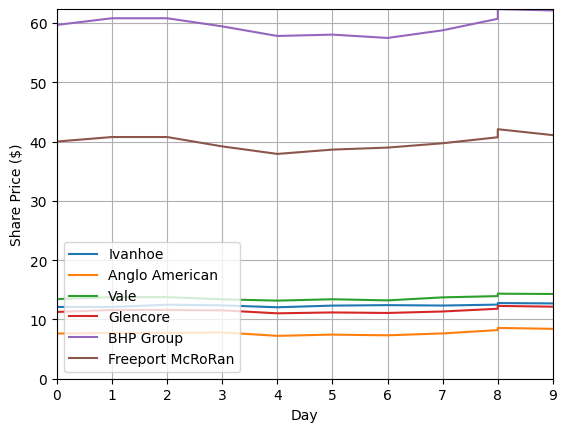

<Figure size 640x480 with 0 Axes>

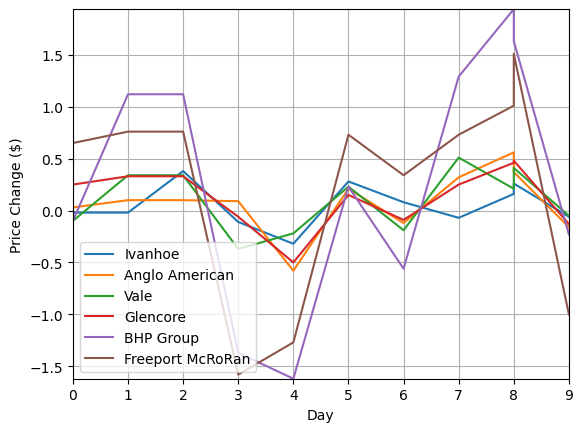

<Figure size 640x480 with 0 Axes>

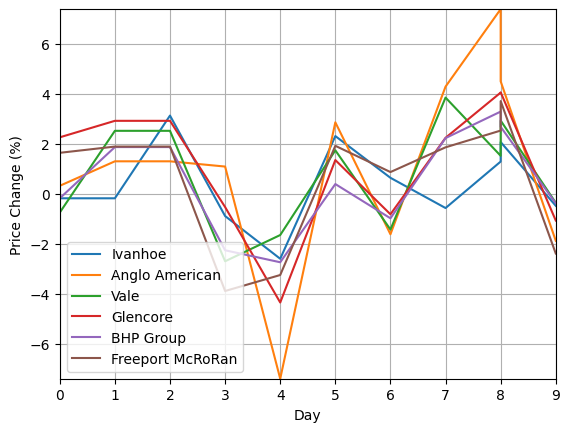

<Figure size 640x480 with 0 Axes>

In [15]:
### MINING ###

Mlinks = ['https://ca.finance.yahoo.com/quote/IVN.TO?p=IVN.TO&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/ANGPY?p=ANGPY&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/VALE?p=VALE&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/GLNCY?p=GLNCY&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/BHP?p=BHP&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/FCX?p=FCX&.tsrc=fin-srch']

Mcompanies = ['Ivanhoe', 'Anglo American', 'Vale', 'Glencore', 'BHP Group', 'Freeport McRoRan', 'Arbor']

MdataFiles = ['./M/IVN_data.csv', './M/ANGPY_data.csv', './M/VALE_data.csv', './M/GLNCY_data.csv', './M/BHP_data.csv', './M/FCX_data.csv', './M/ARB_data.csv']

for i in range(len(Mlinks)):
    parse(Mlinks[i], Mcompanies[i], MdataFiles[i])

plot(MdataFiles, Mcompanies, 0, day, 0, 0, labels1)

Exponent, price: 95.50
Exponent, delta: +1.10
Exponent, percent: +1.17
--------------------
Simpson Manufacturing price: 145.11
Simpson Manufacturing delta: +1.37
Simpson Manufacturing percent: +0.95
--------------------
Commercial Metals price: 55.24
Commercial Metals delta: -0.69
Commercial Metals percent: -1.23
--------------------
Ashland price: 77.50
Ashland delta: -0.50
Ashland percent: -0.64
--------------------
Meta Materials price: 0.1866
Meta Materials delta: -0.0003
Meta Materials percent: -0.16
--------------------


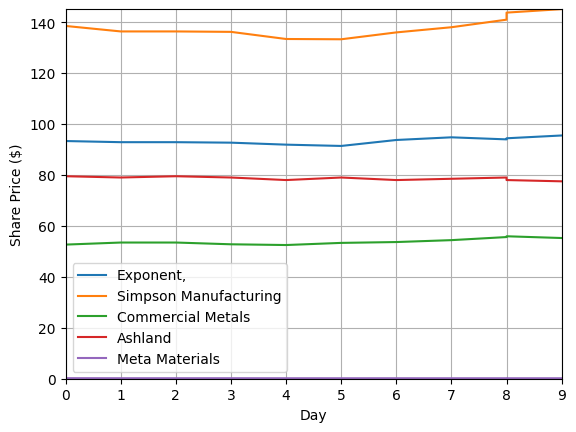

<Figure size 640x480 with 0 Axes>

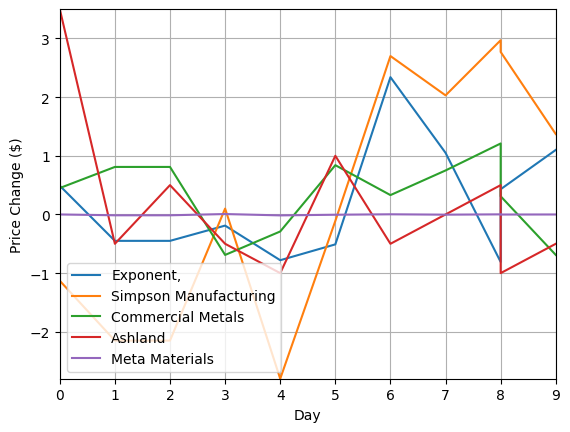

<Figure size 640x480 with 0 Axes>

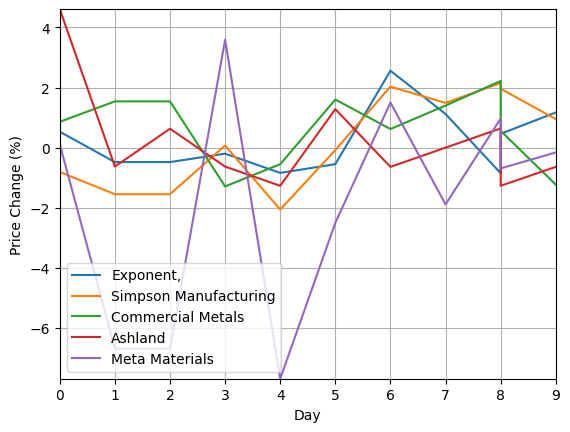

<Figure size 640x480 with 0 Axes>

In [16]:
### NANOTECH & MATERIALS ###

NMlinks = ['https://ca.finance.yahoo.com/quote/EXPO?p=EXPO&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/SSD?p=SSD&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/CMC?p=CMC&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/AHT.SG?p=AHT.SG&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/MMAT?p=MMAT&.tsrc=fin-srch']

NMcompanies = ['Exponent,', 'Simpson Manufacturing', 'Commercial Metals', 'Ashland', 'Meta Materials']

NMdataFiles = ['./NM/EXPO_data.csv', './NM/SSD_data.csv', './NM/CMC_data.csv', './NM/AHTSG_data.csv', './NM/MMAT_data.csv']

for i in range(len(NMlinks)):
    parse(NMlinks[i], NMcompanies[i], NMdataFiles[i])

plot(NMdataFiles, NMcompanies, 0, day, 0, 0, labels1)

CVS price: 71.38
CVS delta: +0.16
CVS percent: +0.22
--------------------
IDEXX price: 536.89
IDEXX delta: +4.09
IDEXX percent: +0.77
--------------------
Amgen price: 227.43
Amgen delta: -0.23
Amgen percent: -0.10
--------------------
ResMed price: 222.35
ResMed delta: +3.66
ResMed percent: +1.67
--------------------
Tandem price: 30.13
Tandem delta: +0.54
Tandem percent: +1.82
--------------------
JNJ price: 159.87
JNJ delta: +1.06
JNJ percent: +0.67
--------------------
RCM price: 18.47
RCM delta: +0.41
RCM percent: +2.27
--------------------
Syneos price: 42.31
Syneos delta: -0.02
Syneos percent: -0.05
--------------------


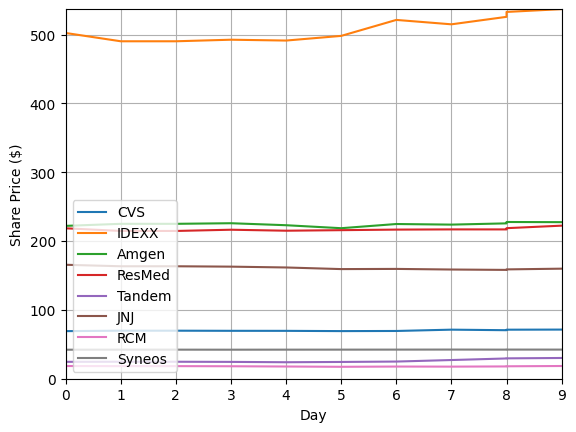

<Figure size 640x480 with 0 Axes>

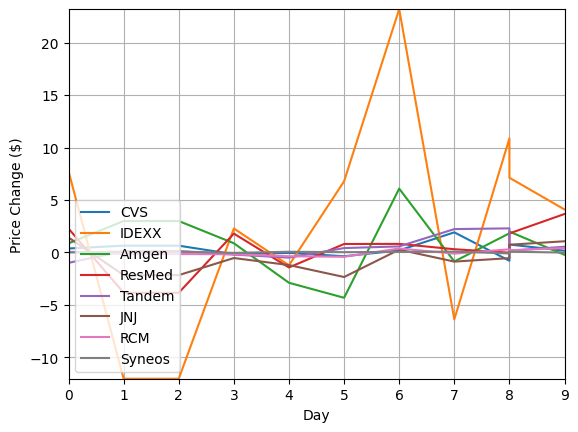

<Figure size 640x480 with 0 Axes>

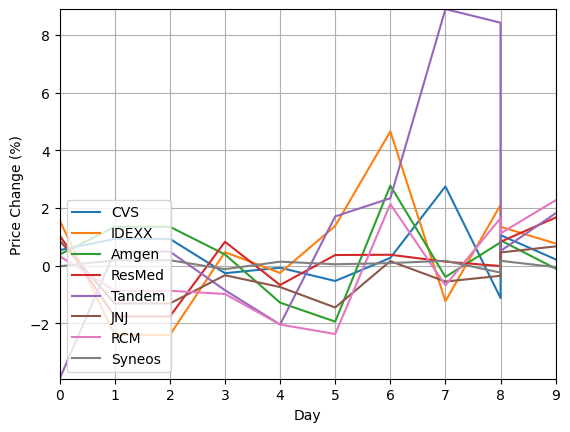

<Figure size 640x480 with 0 Axes>

In [17]:
### RESEARCH, PHARMA, & HEALTHCARE ###

RPHlinks = ['https://ca.finance.yahoo.com/quote/CVS?p=CVS&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/IDXX?p=IDXX&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/AMGN?p=AMGN&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/RMD?p=RMD&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/TNDM?p=TNDM&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/JNJ?p=JNJ&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/RCM?p=RCM&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/SYNH?p=SYNH&.tsrc=fin-srch']

RPHcompanies = ['CVS', 'IDEXX', 'Amgen', 'ResMed', 'Tandem', 'JNJ', 'RCM', 'Syneos']

RPHdataFiles = ['./RPH/CVS_data.csv', './RPH/IDEXX_data.csv', './RPH/AMGN_data.csv', './RPH/RMD_data.csv', \
                './RPH/TNDM_data.csv',  './RPH/JNJ_data.csv', './RPH/RCM_data.csv', './RPH/SYNH_data.csv']

for i in range(len(RPHlinks)):
    parse(RPHlinks[i], RPHcompanies[i], RPHdataFiles[i])

plot(RPHdataFiles, RPHcompanies, 0, day, 0, 0, labels1)

Proctor & Gamble price: 150.05
Proctor & Gamble delta: +1.10
Proctor & Gamble percent: +0.74
--------------------
Coca Cola price: 60.90
Coca Cola delta: +0.55
Coca Cola percent: +0.91
--------------------
Wayfair price: 69.51
Wayfair delta: -2.67
Wayfair percent: -3.70
--------------------
Shopify price: 68.45
Shopify delta: -1.92
Shopify percent: -2.73
--------------------
Costco price: 546.70
Costco delta: +8.25
Costco percent: +1.53
--------------------
McDonalds price: 294.94
McDonalds delta: -0.28
McDonalds percent: -0.09
--------------------


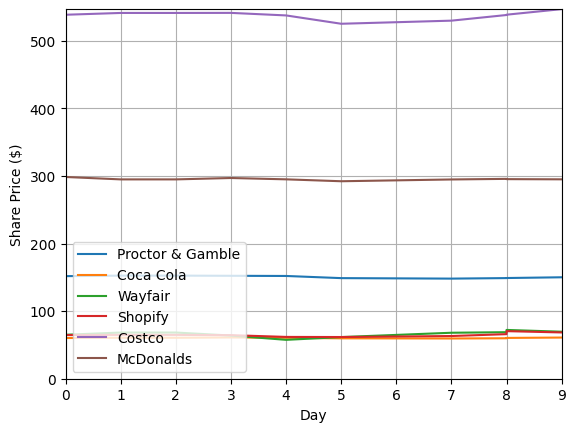

<Figure size 640x480 with 0 Axes>

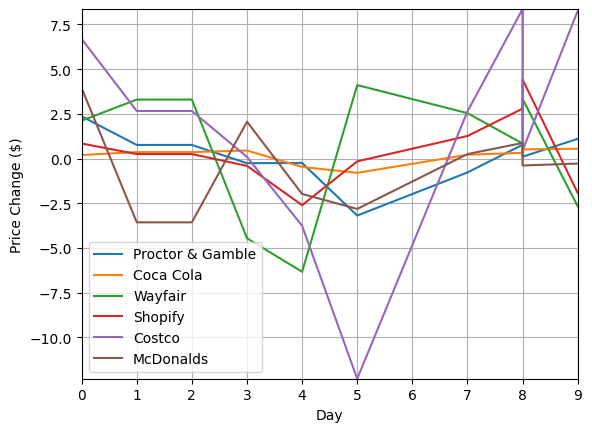

<Figure size 640x480 with 0 Axes>

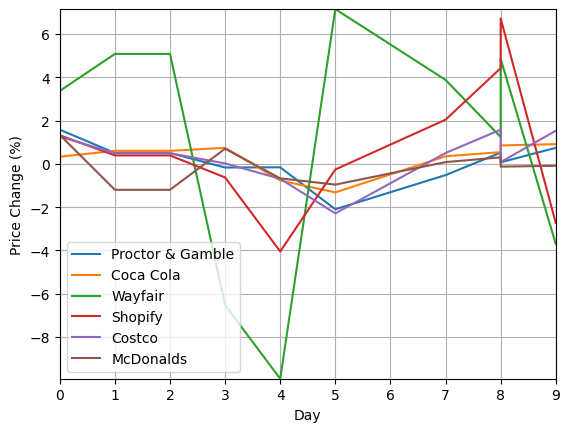

<Figure size 640x480 with 0 Axes>

In [18]:
### RETAIL & SERVICES ###

RSlinks = ['https://ca.finance.yahoo.com/quote/PG?p=PG&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/KO?p=KO&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/W?p=W&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/SHOP?p=SHOP&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/COST?p=COST&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/MCD?p=MCD&.tsrc=fin-srch']

RScompanies = ['Proctor & Gamble', 'Coca Cola', 'Wayfair', 'Shopify', 'Costco', 'McDonalds']

RSdataFiles = ['./RS/PG_data.csv', './RS/KO_data.csv', './RS/W_data.csv', './RS/SHOP_data.csv', './RS/COST_data.csv', './RS/MCD_data.csv']

for i in range(len(RSlinks)):
    parse(RSlinks[i], RScompanies[i], RSdataFiles[i])

plot(RSdataFiles, RScompanies, 0, day, 0, 0, labels1)

Onto price: 111.78
Onto delta: -0.31
Onto percent: -0.28
--------------------
Applied Materials price: 142.74
Applied Materials delta: +0.09
Applied Materials percent: +0.06
--------------------
Micron Tech price: 64.08
Micron Tech delta: -0.45
Micron Tech percent: -0.70
--------------------
ASML holdings price: 754.02
ASML holdings delta: +3.28
ASML holdings percent: +0.44
--------------------
Taiwan Semiconductors price: 105.14
Taiwan Semiconductors delta: -0.43
Taiwan Semiconductors percent: -0.41
--------------------
Nvidia price: 454.69
Nvidia delta: -5.08
Nvidia percent: -1.10
--------------------
Marvell price: 63.45
Marvell delta: -1.92
Marvell percent: -2.94
--------------------
AMD price: 115.94
AMD delta: +0.02
AMD percent: +0.02
--------------------
ON price: 99.68
ON delta: -2.36
ON percent: -2.31
--------------------


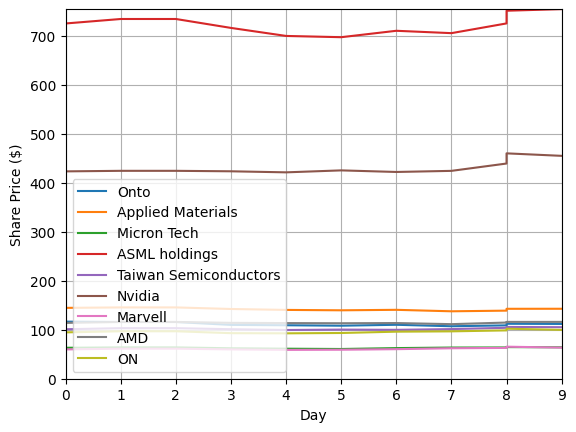

<Figure size 640x480 with 0 Axes>

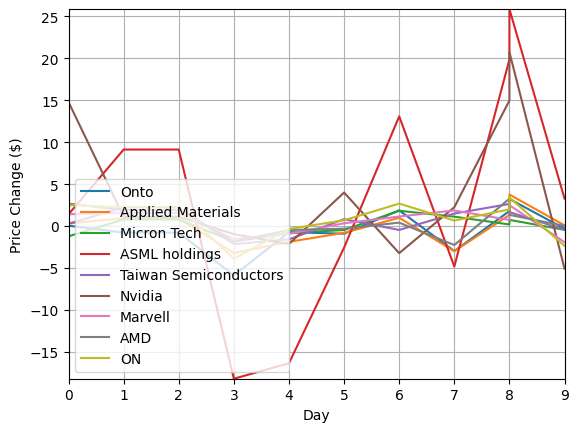

<Figure size 640x480 with 0 Axes>

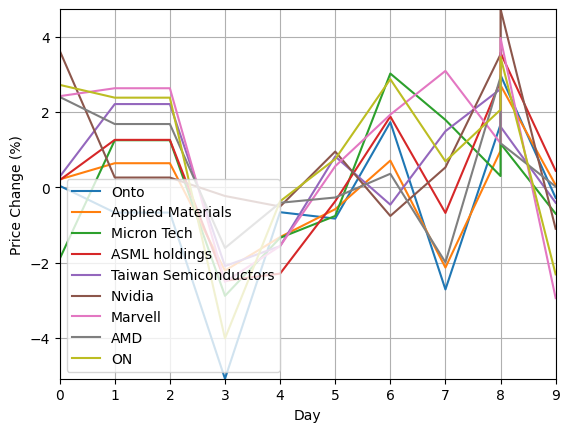

<Figure size 640x480 with 0 Axes>

In [19]:
### SEMICONDUCTORS & MICROPROCESSORS ###

SMlinks = ['https://ca.finance.yahoo.com/quote/ONTO?p=ONTO&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/AMAT?p=AMAT&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/MU?p=MU&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/ASML?p=ASML&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/TSM?p=TSM&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/NVDA?p=NVDA&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/MRVL?p=MRVL&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/AMD?p=AMD&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/ON?p=ON&.tsrc=fin-srch']

SMcompanies = ['Onto', 'Applied Materials', 'Micron Tech', 'ASML holdings', 'Taiwan Semiconductors', 'Nvidia', 'Marvell', 'AMD', 'ON']

SMdataFiles = ['./SM/ONTO_data.csv', './SM/AMAT_data.csv', './SM/MU_data.csv', './SM/ASML_data.csv', './SM/TSM_data.csv', \
               './SM/NVDA_data.csv', './SM/MRVL_data.csv', './SM/AMD_data.csv', './SM/ON_data.csv']

for i in range(len(SMlinks)):
    parse(SMlinks[i], SMcompanies[i], SMdataFiles[i])

plot(SMdataFiles, SMcompanies, 0, day, 0, 0, labels1)

Snapchat price: 13.15
Snapchat delta: -0.36
Snapchat percent: -2.66
--------------------
Unity price: 44.34
Unity delta: -2.50
Unity percent: -5.34
--------------------
Meta price: 308.87
Meta delta: -4.54
Meta percent: -1.45
--------------------
Sony price: 92.39
Sony delta: -1.42
Sony percent: -1.51
--------------------


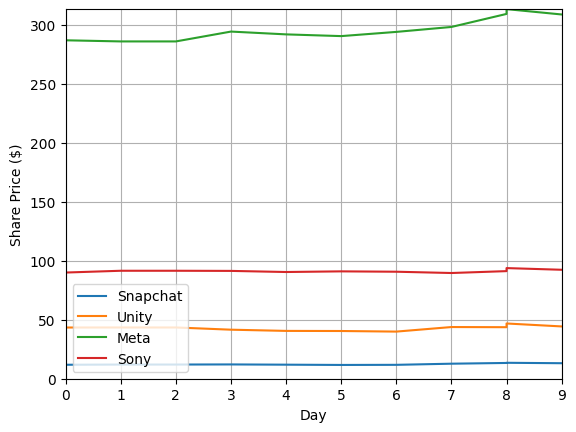

<Figure size 640x480 with 0 Axes>

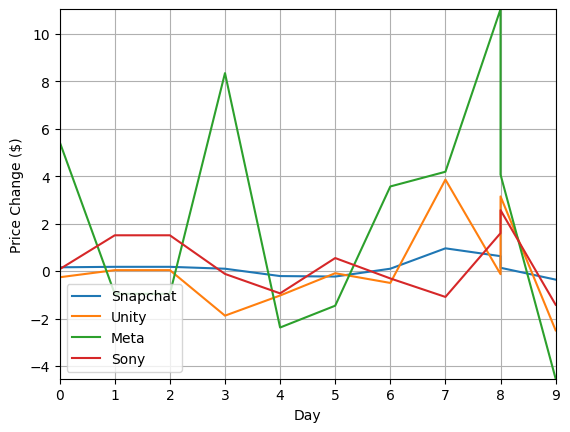

<Figure size 640x480 with 0 Axes>

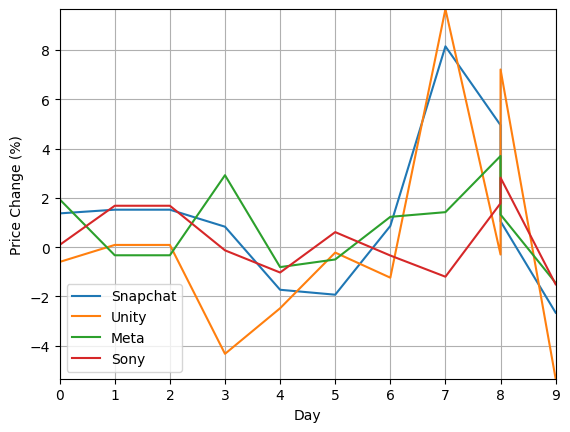

<Figure size 640x480 with 0 Axes>

In [20]:
### SOCIAL MEDIA & MEDIA TECH ###

SMMTlinks = ['https://ca.finance.yahoo.com/quote/SNAP?p=SNAP&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/U?p=U&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/META?p=META&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/SONY?p=SONY&.tsrc=fin-srch']

SMMTcompanies = ['Snapchat', 'Unity', 'Meta', 'Sony']

SMMTdataFiles = ['./SMMT/SNAP_data.csv', './SMMT/U_data.csv', './SMMT/META_data.csv', './SMMT/SONY_data.csv']

for i in range(len(SMMTlinks)):
    parse(SMMTlinks[i], SMMTcompanies[i], SMMTdataFiles[i])

plot(SMMTdataFiles, SMMTcompanies, 0, day, 0, 0, labels1)

Amazon price: 134.68
Amazon delta: +0.38
Amazon percent: +0.28
--------------------
Open Text price: 54.94
Open Text delta: -0.20
Open Text percent: -0.36
--------------------
C3AI price: 37.23
C3AI delta: -2.42
C3AI percent: -6.10
--------------------
Tyler Tech price: 410.98
Tyler Tech delta: -9.67
Tyler Tech percent: -2.30
--------------------
Adobe price: 514.83
Adobe delta: -2.45
Adobe percent: -0.47
--------------------
Zebra price: 309.28
Zebra delta: -9.19
Zebra percent: -2.89
--------------------
Constellation price: 2698.04
Constellation delta: +13.97
Constellation percent: +0.52
--------------------
Atlassian price: 178.97
Atlassian delta: +1.01
Atlassian percent: +0.57
--------------------
Microsoft price: 345.24
Microsoft delta: +2.58
Microsoft percent: +0.75
--------------------
Alphabet price: 125.70
Alphabet delta: +0.87
Alphabet percent: +0.70
--------------------
Apple price: 190.69
Apple delta: +0.15
Apple percent: +0.08
--------------------
IBM price: 133.40
IBM del

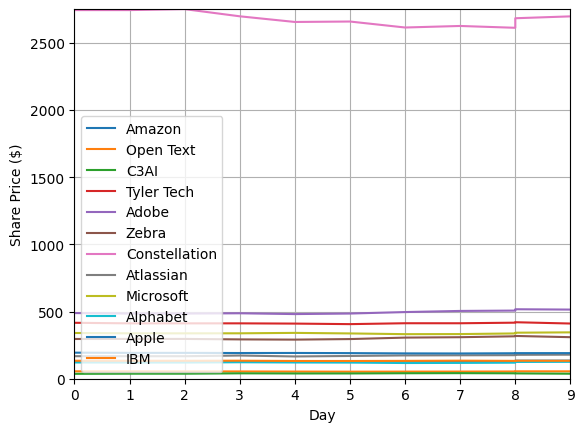

<Figure size 640x480 with 0 Axes>

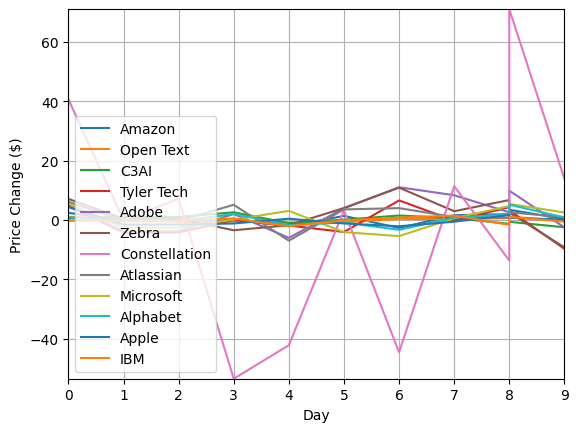

<Figure size 640x480 with 0 Axes>

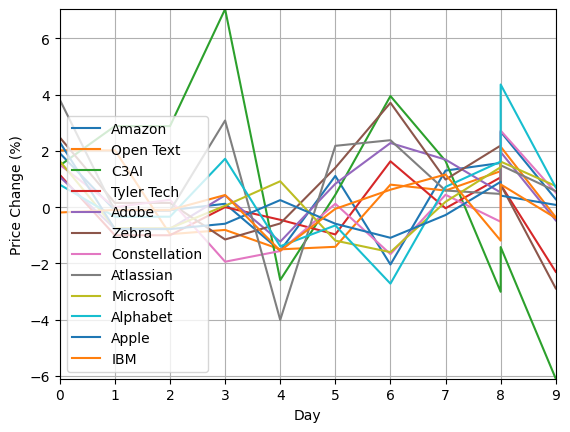

<Figure size 640x480 with 0 Axes>

In [21]:
### TECH & SOFTWARE     .... GO INTO ./TS/CSUTO_data.csv and remove comma from data, it fucks with makeArray

TSlinks = ['https://ca.finance.yahoo.com/quote/AMZN?p=AMZN&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/OTEX.TO?p=OTEX.TO&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/AI?p=AI&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/TYL?p=TYL&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/ADBE?p=ADBE&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/ZBRA?p=ZBRA&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/CSU.TO?p=CSU.TO&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/TEAM?p=TEAM&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/MSFT?p=MSFT&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/GOOG?p=GOOG&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/IBM?p=IBM&.tsrc=fin-srch']

TScompanies = ['Amazon', 'Open Text', 'C3AI', 'Tyler Tech', 'Adobe', 'Zebra', 'Constellation', 'Atlassian', 'Microsoft', 'Alphabet', 'Apple', 'IBM']

TSdataFiles = ['./TS/AMZN_data.csv', './TS/OTXTO.csv', './TS/AI_data.csv', './TS/TYL_data.csv', './TS/ADBE_data.csv', './TS/ZBRA_data.csv', './TS/CSUTO_data.csv', './TS/TEAM_data.csv', './TS/MSFT_data.csv', './TS/GOOG_data.csv', './TS/AAPL_data.csv', './TS/IBM_data.csv']

for i in range(len(TSlinks)):
    parse(TSlinks[i], TScompanies[i], TSdataFiles[i])

plot(TSdataFiles, TScompanies, 0, day, 0, 0, labels1)

Rogers price: 170.89
Rogers delta: +1.18
Rogers percent: +0.70
--------------------
Qualcomm price: 122.56
Qualcomm delta: -0.56
Qualcomm percent: -0.45
--------------------
AT&T price: 14.50
AT&T delta: -0.62
AT&T percent: -4.10
--------------------
Telus price: 139.68
Telus delta: -1.01
Telus percent: -0.72
--------------------
SBA Comms price: 243.77
SBA Comms delta: -0.08
SBA Comms percent: -0.03
--------------------
Aviat Nets price: 30.97
Aviat Nets delta: -1.05
Aviat Nets percent: -3.28
--------------------
Arista Nets price: 165.58
Arista Nets delta: -3.03
Arista Nets percent: -1.80
--------------------
Broadcom price: 888.58
Broadcom delta: -1.78
Broadcom percent: -0.20
--------------------
Ciena price: 41.46
Ciena delta: -2.34
Ciena percent: -5.34
--------------------


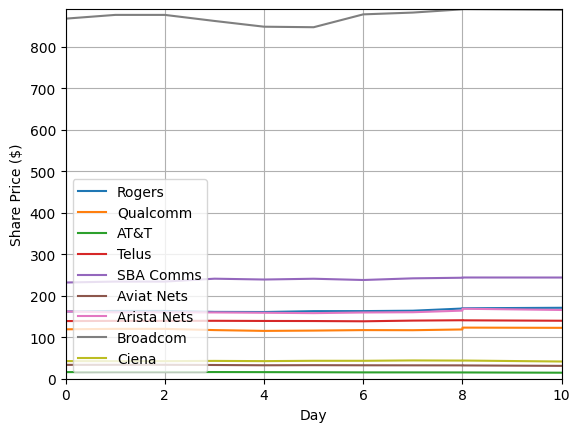

<Figure size 640x480 with 0 Axes>

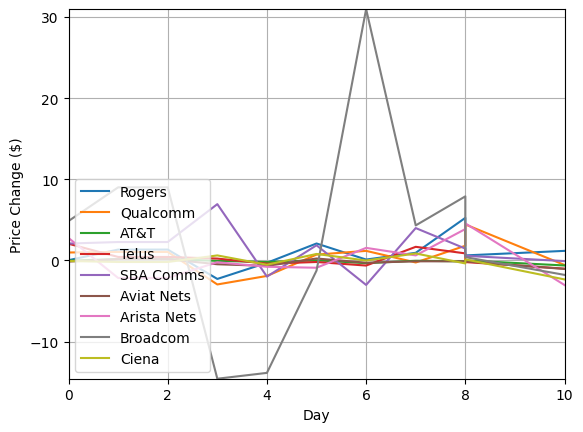

<Figure size 640x480 with 0 Axes>

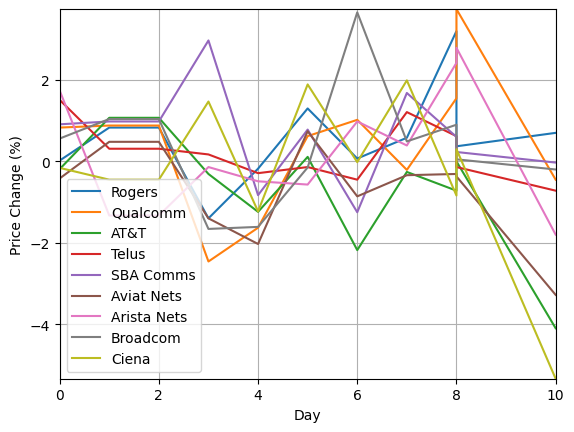

<Figure size 640x480 with 0 Axes>

In [24]:
### TELECOMMUNICATIONS & 5G ###

TTlinks = ['https://ca.finance.yahoo.com/quote/ROG?p=ROG&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/QCOM?p=QCOM&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/T?p=T&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/TMUS?p=TMUS&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/SBAC?p=SBAC&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/AVNW?p=AVNW&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/ANET?p=ANET&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/AVGO?p=AVGO&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/CIEN?p=CIEN&.tsrc=fin-srch']

TTcompanies = ['Rogers', 'Qualcomm', 'AT&T', 'Telus', 'SBA Comms', 'Aviat Nets', 'Arista Nets', 'Broadcom', 'Ciena']

TTdataFiles = ['./TT/ROG_data.csv', './TT/QCOM_data.csv', './TT/T_data.csv', './TT/TMUS_data.csv', './TT/SBAC_data.csv', './TT/AVNW_data.csv', './TT/ANET_data.csv', './TT/AVGO_data.csv', './TT/CIEN_data.csv']

for i in range(len(TTlinks)):
    parse(TTlinks[i], TTcompanies[i], TTdataFiles[i])

plot(TTdataFiles, TTcompanies, 0, day, 0, 0, labels1)

Redfin price: 16.59
Redfin delta: -0.42
Redfin percent: -2.47
--------------------
AirBNB price: 143.34
AirBNB delta: +3.25
AirBNB percent: +2.32
--------------------
Tripadvisor price: 17.22
Tripadvisor delta: -0.18
Tripadvisor percent: -1.03
--------------------


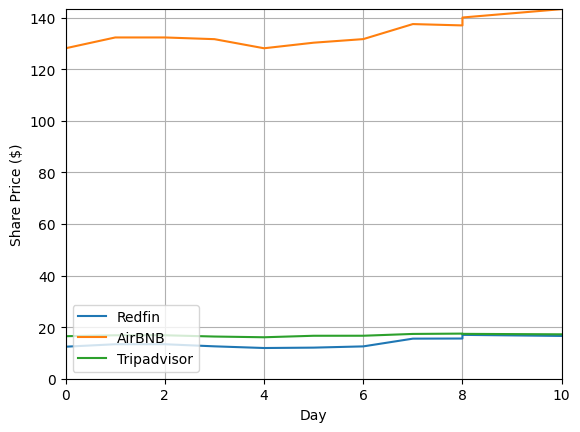

<Figure size 640x480 with 0 Axes>

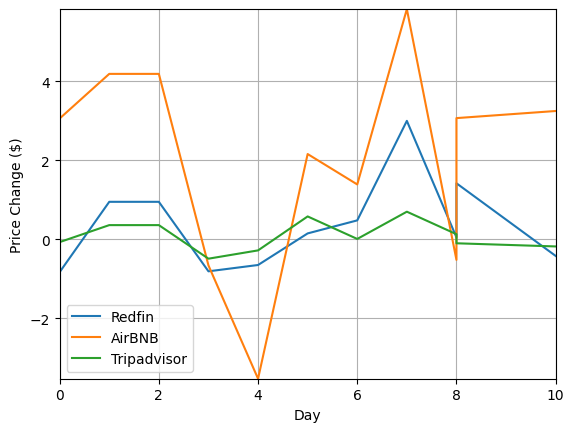

<Figure size 640x480 with 0 Axes>

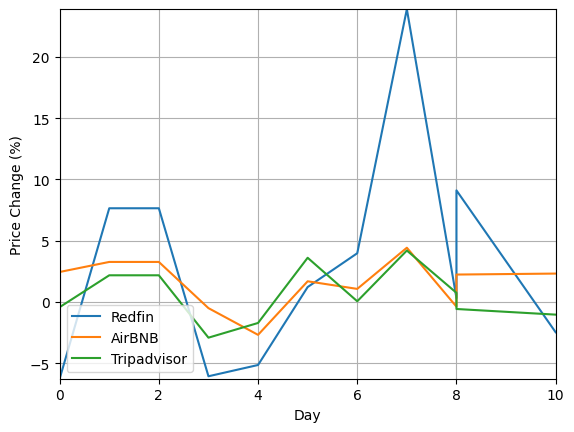

<Figure size 640x480 with 0 Axes>

In [25]:
## TRAVEL SERVICES & PROPERTY ###

TVLlinks = ['https://ca.finance.yahoo.com/quote/RDFN?p=RDFN&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/ABNB?p=ABNB&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/TRIP?p=TRIP&.tsrc=fin-srch']

TVLcompanies = ['Redfin', 'AirBNB', 'Tripadvisor']

TVLdataFiles = ['./TVL/RDFN_data.csv', './TVL/ABNB_data.csv', './TVL/TRIP_data.csv']

for i in range(len(TVLlinks)):
    parse(TVLlinks[i], TVLcompanies[i], TVLdataFiles[i])

plot(TVLdataFiles, TVLcompanies, 0, day, 0, 0, labels1)

Trulieve price: 4.7000
Trulieve delta: -0.1200
Trulieve percent: -2.49
--------------------
Trulieve CA price: 6.22
Trulieve CA delta: -0.08
Trulieve CA percent: -1.27
--------------------


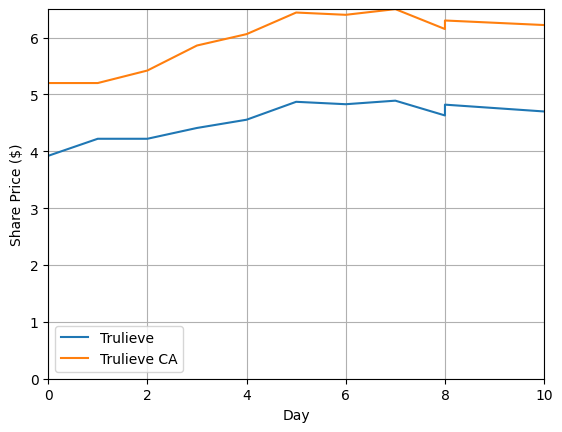

<Figure size 640x480 with 0 Axes>

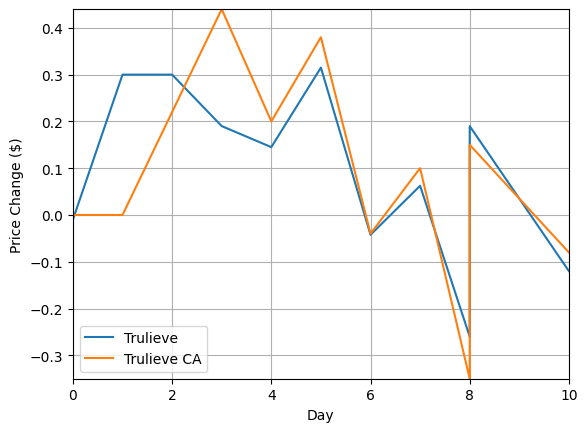

<Figure size 640x480 with 0 Axes>

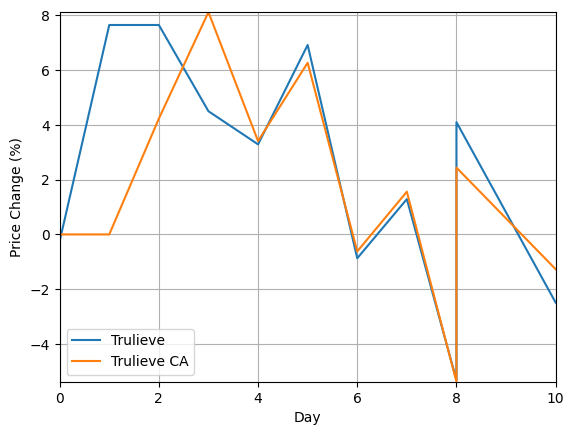

<Figure size 640x480 with 0 Axes>

In [26]:
## WEED ###

Wlinks = ['https://ca.finance.yahoo.com/quote/TCNNF?p=TCNNF&.tsrc=fin-srch', 'https://ca.finance.yahoo.com/quote/TRUL.CN?p=TRUL.CN&.tsrc=fin-srch']

Wcompanies = ['Trulieve', 'Trulieve CA']

WdataFiles = ['./W/T_data.csv', './W/TC_data.csv']

for i in range(len(Wlinks)):
    parse(Wlinks[i], Wcompanies[i], WdataFiles[i])

plot(WdataFiles, Wcompanies, 0, day, 0, 0, labels1)

In [93]:
### In the applicable cases, we wish to monitor the volume, 3M-average volume, and market cap

def volume(link, company, dataFile):

    url = link
    driver = webdriver.Chrome()  # Open Chrome Browser
    driver.get(url)  # Webpage URL

    volume_element = driver.find_element(By.CSS_SELECTOR, '#quote-summary > div.D\(ib\).W\(1\/2\).Bxz\(bb\).Pend\(12px\).Va\(t\).ie-7_D\(i\).smartphone_D\(b\).smartphone_W\(100\%\).smartphone_Pend\(0px\).smartphone_BdY.smartphone_Bdc\(\$seperatorColor\) > table > tbody > tr:nth-child(7) > td.Ta\(end\).Fw\(600\).Lh\(14px\) > fin-streamer')
    volume = volume_element.text
    volume = volume.replace(',', '')

    print(company, 'volume:', volume)   # volume

    B = False
    for i in range(len(volume)):
        if volume[i] == 'B':
            volume = volume.strip('B')
            volume = float(volume)*1e9
            B = True
    if B == False:
        volume = volume.strip('M')
        volume = float(volume)*1e6

    avg_element = driver.find_element(By.CSS_SELECTOR, '#quote-summary > div.D\(ib\).W\(1\/2\).Bxz\(bb\).Pend\(12px\).Va\(t\).ie-7_D\(i\).smartphone_D\(b\).smartphone_W\(100\%\).smartphone_Pend\(0px\).smartphone_BdY.smartphone_Bdc\(\$seperatorColor\) > table > tbody > tr.Bxz\(bb\).Bdbw\(1px\).Bdbs\(s\).Bdc\(\$seperatorColor\).H\(36px\).Bdbw\(0\)\! > td.Ta\(end\).Fw\(600\).Lh\(14px\)')
    avg = avg_element.text
    avg = avg.replace(',', '')

    print(company, 'avg:', avg)   # avg volume

    B = False
    for i in range(len(avg)):
        if avg[i] == 'B':
            avg = avg.strip('B')
            avg = float(avg)*1e9
            B = True
    if B == False:
        avg = avg.strip('M')
        avg = float(avg)*1e6

    cap_element = driver.find_element(By.CSS_SELECTOR, '#quote-summary > div.D\(ib\).W\(1\/2\).Bxz\(bb\).Pstart\(12px\).Va\(t\).ie-7_D\(i\).ie-7_Pos\(a\).smartphone_D\(b\).smartphone_W\(100\%\).smartphone_Pstart\(0px\).smartphone_BdB.smartphone_Bdc\(\$seperatorColor\) > table > tbody > tr:nth-child(1) > td.Ta\(end\).Fw\(600\).Lh\(14px\)')
    cap = cap_element.text
    cap = cap.replace(',', '')

    print(company, 'Market Cap:', cap)   # market cap

    B = False
    for i in range(len(cap)):
        if cap[i] == 'B':
            cap = cap.strip('B')
            cap = float(cap)*1e9
            B = True

    if B == False:
        if cap[i] == 'M':
            cap = cap.strip('M')
            cap = float(cap)*1e6
            B = True

    if B == False:
        cap = cap.strip('T')
        cap = float(cap)*1e12

    with open(dataFile, 'a', newline='') as file:   # Write the day, price, delta, and percent to csv
        writer = csv.writer(file)
        writer.writerow([day, volume, avg, cap])

    driver.quit() # Quit chrome so that a million Chrome browsers don't open
    print('--------------------')  # Print divider to break up print statements

In [11]:
# Weekly runs: day 0 = 2023/07/03

day = 0

In [10]:
## AEROSPACE & DEFENSE ##

DataFiles = ['./AA/vRTX.csv', './AA/vGD.csv', './AA/vAIR.csv', './AA/vBAE.csv', './AA/vNOC.csv', './AA/vLMT.csv', './AA/vBA.csv']

for i in range(len(AAlinks)):
    volume(AAlinks[i], AAcompanies[i], DataFiles[i])

plot(DataFiles, AAcompanies, 0, day, 0, 0, labels2)

NameError: name 'AAlinks' is not defined

In [59]:
## AUTOMOTIVE ##

DataFiles = ['./Auto/vBMW_data.csv', './Auto/vVLKAF_data.csv', './Auto/vTM_data.csv', './Auto/vTSLA_data.csv', './Auto/vF_data.csv', './Auto/vNIO_data.csv']

for i in range(len(autoLinks)):
    volume(autoLinks[i], autoCompanies[i], DataFiles[i])

plot(DataFiles, autoCompanies, 0, day, 0, 0, labels2)

BMW volume: 1179553
BMW avg: 1041988
BMW Market Cap: 73.389B
--------------------
Volkswagen volume: 2029
Volkswagen avg: 940
Volkswagen Market Cap: 78.395B
--------------------
Toyota volume: 182983
Toyota avg: 313754
Toyota Market Cap: 220.852B
--------------------
Tesla volume: 86227257
Tesla avg: 138449963
Tesla Market Cap: 884.132B
--------------------
Ford volume: 37681284
Ford avg: 59911606
Ford Market Cap: 60.292B
--------------------
NIO volume: 42293254
NIO avg: 53329477
NIO Market Cap: 17.712B
--------------------


In [64]:
## BATTERY PRODUCERS ##

DataFiles = ['./BAT/vFREYR_data.csv', './BAT/vLTHM_data.csv', './BAT/vPCRFY_data.csv', './BAT/vSLDP_data.csv', './BAT/vALB_data.csv', './BAT/vQS_data.csv', './BAT/vMVST_data.csv']

for i in range(len(batLinks)):
    volume(batLinks[i], batCompanies[i], DataFiles[i])

plot(DataFiles, batCompanies, 0, day, 0, 0, labels2)

[[0.0], [2194571000000.0], [2116172000000.0], [1248000000.0]]
[[0.0], [1494095000000.0], [3291585000000.0], [4923000000.0]]
[[0.0], [149343000000.0], [186175000000.0], [28422000000.0]]
[[0.0], [3628581000000.0], [2447950000000.0], [496146000.0]]
[[0.0], [2103950000000.0], [2280844000000.0], [27870000000.0]]
[[0.0], [8617393000000.0], [5122347000000.0], [3895000000.0]]
[[0.0], [5377628000000.0], [4319304000000.0], [625043000.0]]


In [65]:
## CLOUD COMPUTING ##

DataFiles = ['./CC/vSNOW_data.csv', './CC/vNOW_data.csv', './CC/vVEEV_data.csv', './CC/vLRCX_data.csv']

for i in range(len(CClinks)):
    volume(CClinks[i], CCcompanies[i], DataFiles[i])

plot(DataFiles, CCcompanies, 0, day, 0, 0, labels2)

Snowflake volume: 3199008
Snowflake avg: 6386480
Snowflake Market Cap: 55.602B
--------------------
ServiceNow volume: 851716
ServiceNow avg: 1573500
ServiceNow Market Cap: 112.664B
--------------------


Exception ignored in: <function Service.__del__ at 0x000001D97B736670>
Traceback (most recent call last):
  File "C:\Users\kylem\PycharmProjects\StockTrading\venv\lib\site-packages\selenium\webdriver\common\service.py", line 181, in __del__
    self.stop()
  File "C:\Users\kylem\PycharmProjects\StockTrading\venv\lib\site-packages\selenium\webdriver\common\service.py", line 142, in stop
    self.send_remote_shutdown_command()
  File "C:\Users\kylem\PycharmProjects\StockTrading\venv\lib\site-packages\selenium\webdriver\common\service.py", line 121, in send_remote_shutdown_command
    request.urlopen(f"{self.service_url}/shutdown")
  File "C:\Users\kylem\AppData\Local\Programs\Python\Python39\lib\urllib\request.py", line 214, in urlopen
    return opener.open(url, data, timeout)
  File "C:\Users\kylem\AppData\Local\Programs\Python\Python39\lib\urllib\request.py", line 517, in open
    response = self._open(req, data)
  File "C:\Users\kylem\AppData\Local\Programs\Python\Python39\lib\urllib

Veeva Systems volume: 495084
Veeva Systems avg: 1090139
Veeva Systems Market Cap: 31.183B
--------------------
Lam Research volume: 728746
Lam Research avg: 1333378
Lam Research Market Cap: 83.005B
--------------------
[[], [], [], []]
[[0.0], [851716000000.0], [1573500000000.0], [112664000000.0]]
[[0.0], [495084000000.0], [1090139000000.0], [31183000000.0]]
[[0.0, 0.0], [389677000000.0, 728746000000.0], [1333378000000.0, 1333378000000.0], [84000000000.0, 83005000000.0]]


In [70]:
## CRISPR & GENOME ENGINEERING ##

DataFiles = ['./CRISPR/vEDIT_data.csv', './CRISPR/vNTLA_data.csv', './CRISPR/vCRSP_data.csv', './CRISPR/vARWR_data.csv']

for i in range(len(CRISPlinks)):
    volume(CRISPlinks[i], CRISPcompanies[i], DataFiles[i])

plot(DataFiles, CRISPcompanies, 0, day, 0, 0, labels2)

Editas volume: 1230490
Editas avg: 2304729
Editas Market Cap: 685.632M
--------------------
Intellia volume: 682369
Intellia avg: 1027029
Intellia Market Cap: 3.468B
--------------------
CRISPR volume: 685269
CRISPR avg: 1398624
CRISPR Market Cap: 4.292B
--------------------
Arrowhead volume: 1259082
Arrowhead avg: 1024949
Arrowhead Market Cap: 3.562B
--------------------
[[0.0], [1230490000000.0], [2304729000000.0], [685632000.0]]
[[0.0], [682369000000.0], [1027029000000.0], [3468000000.0]]
[[0.0], [685269000000.0], [1398624000000.0], [4292000000.0]]
[[0.0], [1259082000000.0], [1024949000000.0], [3562000000.0]]


In [71]:
## CYBERSECURITY ##

DataFiles = ['./CS/vZS_data.csv', './CS/vCRWD_data.csv', './CS/vNET_data.csv', './CS/vFTNT_data.csv', './CS/vACN_data.csv', './CS/vOKTA_data.csv']

for i in range(len(CSlinks)):
    volume(CSlinks[i], CScompanies[i], DataFiles[i])

plot(DataFiles, CScompanies, 0, day, 0, 0, labels2)

Zscalar volume: 1717829
Zscalar avg: 2943891
Zscalar Market Cap: 20.889B
--------------------
Crowdstrike volume: 2263607
Crowdstrike avg: 3906601
Crowdstrike Market Cap: 34.155B
--------------------
Cloudflare volume: 2524760
Cloudflare avg: 5694732
Cloudflare Market Cap: 20.698B
--------------------
Fortinet volume: 3914900
Fortinet avg: 5095414
Fortinet Market Cap: 58.638B
--------------------
Accenture volume: 1902515
Accenture avg: 2654885
Accenture Market Cap: 193.027B
--------------------
[[0.0], [1717829000000.0], [2943891000000.0], [20889000000.0]]
[[0.0], [2263607000000.0], [3906601000000.0], [34155000000.0]]
[[0.0], [2524760000000.0], [5694732000000.0], [20698000000.0]]
[[0.0], [3914900000000.0], [5095414000000.0], [58638000000.0]]
[[0.0], [1902515000000.0], [2654885000000.0], [193027000000.0]]


In [72]:
## FINANCIAL SERVICES ##

DataFiles = FSTdataFiles = ['./FST/vTTD_data.csv', './FST/vFICO_data.csv', './FST/vASAN_data.csv', './FST/vSOFI_data.csv', \
                './FST/vAFRM_data.csv', './FST/vMA_data.csv', './FST/vPAYC_data.csv', './FST/vUPST_data.csv', \
                './FST/vPYPL_data.csv', './FST/vMASI_data.csv', './FST/vCOIN_data.csv']

for i in range(len(FSTlinks)):
    volume(FSTlinks[i], FSTcompanies[i], DataFiles[i])

plot(DataFiles, FSTcompanies, 0, day, 0, 0, labels2)

Trade Desk volume: 2311659
Trade Desk avg: 3598026
Trade Desk Market Cap: 37.055B
--------------------
Fair Isaac volume: 110096
Fair Isaac avg: 199844
Fair Isaac Market Cap: 19.839B
--------------------
Asana volume: 2581660
Asana avg: 2332760
Asana Market Cap: 4.53B
--------------------
SOFI volume: 22379440
SOFI avg: 52274378
SOFI Market Cap: 7.574B
--------------------
Affirm volume: 12646012
Affirm avg: 15730427
Affirm Market Cap: 4.036B
--------------------
MasterCard volume: 2649120
MasterCard avg: 2803618
MasterCard Market Cap: 368.324B
--------------------
Paycom volume: 397784
Paycom avg: 556600
Paycom Market Cap: 18.78B
--------------------
Upstart volume: 6190923
Upstart avg: 9065719
Upstart Market Cap: 3.034B
--------------------
PayPal volume: 11724052
PayPal avg: 17482234
PayPal Market Cap: 74.518B
--------------------
Masimo volume: 419694
Masimo avg: 443721
Masimo Market Cap: 8.371B
--------------------
Coinbase volume: 13203980
Coinbase avg: 15282496
Coinbase Market C

In [75]:
## INVESTORS ##

DataFiles = ['./INV/vBLK_data.csv', './INV/vJPM_data.csv']

for i in range(len(INVlinks)):
    volume(INVlinks[i], INVcompanies[i], DataFiles[i])

plot(DataFiles, INVcompanies, 0, day, 0, 0, labels2)

[[0.0], [435173000000.0], [620629000000.0], [102453000000.0]]
[[0.0], [8974047000000.0], [10977616000000.0], [421803000000.0]]


In [77]:
## LEGAL SERVICES ##

volume('https://ca.finance.yahoo.com/quote/KNSL?p=KNSL&.tsrc=fin-srch', 'Kinsale', './LL/vKNSL_data.csv')
makeArray('./LL/vKNSL_data.csv', df)

[[0.0], [141141000000.0], [198470000000.0], [8513000000.0]]


In [79]:
## MINING ##

DataFiles = ['./M/vIVN_data.csv', './M/vANGPY_data.csv', './M/vVALE_data.csv', './M/vGLNCY_data.csv', './M/vBHP_data.csv', './M/vFCX_data.csv', './M/vARB_data.csv']

for i in range(len(Mlinks)):
    volume(Mlinks[i], Mcompanies[i], DataFiles[i])

plot(DataFiles, Mcompanies, 0, day, 0, 0, labels2)

Ivanhoe volume: 955702
Ivanhoe avg: 1661022
Ivanhoe Market Cap: 15.015B
--------------------
Anglo American volume: 64496
Anglo American avg: 50901
Anglo American Market Cap: 12.7B
--------------------
Vale volume: 24371211
Vale avg: 22821803
Vale Market Cap: 59.98B
--------------------
Glencore volume: 489966
Glencore avg: 639098
Glencore Market Cap: 73.218B
--------------------
BHP Group volume: 2101150
BHP Group avg: 2743460
BHP Group Market Cap: 148.625B
--------------------
Freeport McRoRan volume: 11075548
Freeport McRoRan avg: 12636340
Freeport McRoRan Market Cap: 55.382B
--------------------
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]


In [80]:
## NANOTECH & MATERIALS ##

DataFiles = ['./NM/vEXPO_data.csv', './NM/vSSD_data.csv', './NM/vCMC_data.csv', './NM/vMMAT_data.csv']

for i in range(len(NMlinks)):
    volume(NMlinks[i], NMcompanies[i], DataFiles[i])

plot(DataFiles, NMcompanies, 0, day, 0, 0, labels2)

Exponent, volume: 226351
Exponent, avg: 249262
Exponent, Market Cap: 4.646B
--------------------
Simpson Manufacturing volume: 110199
Simpson Manufacturing avg: 158296
Simpson Manufacturing Market Cap: 5.687B
--------------------
Commercial Metals volume: 982368
Commercial Metals avg: 764740
Commercial Metals Market Cap: 6.228B
--------------------
Ashland volume: 0
Ashland avg: 0
Ashland Market Cap: N/A


ValueError: could not convert string to float: 'N/A'

In [12]:
## RESEARCH AND PHARMACEUTICALS ##

DataFiles = ['./RPH/vCVS_data.csv', './RPH/vIDEXX_data.csv', './RPH/vAMGN_data.csv', './RPH/vRMD_data.csv', \
                './RPH/vTNDM_data.csv',  './RPH/vJNJ_data.csv', './RPH/vRCM_data.csv', './RPH/vSYNH_data.csv']

for i in range(len(RPHlinks)):
    volume(RPHlinks[i], RPHcompanies[i], DataFiles[i])

plot(DataFiles, RPHcompanies, 0, day, 0, 0, labels2)

CVS volume: 6616621
CVS avg: 8698885
CVS Market Cap: 88.678B
--------------------
IDEXX volume: 414263
IDEXX avg: 396425
IDEXX Market Cap: 41.337B
--------------------
Amgen volume: 2841445
Amgen avg: 2349427
Amgen Market Cap: 116.831B
--------------------
ResMed volume: 569042
ResMed avg: 627646
ResMed Market Cap: 31.708B
--------------------
Tandem volume: 730231
Tandem avg: 1209237
Tandem Market Cap: 1.574B
--------------------
JNJ volume: 6984780
JNJ avg: 6576329
JNJ Market Cap: 413.848B
--------------------
RCM volume: 1928573
RCM avg: 2710406
RCM Market Cap: 7.243B
--------------------
Syneos volume: 1418539
Syneos avg: 2736956
Syneos Market Cap: 4.382B
--------------------


In [19]:
## RETAIL AND SERVICES ##

DataFiles = ['./RS/vPG_data.csv', './RS/vKO_data.csv', './RS/vW_data.csv', './RS/vSHOP_data.csv', './RS/vCOST_data.csv', './RS/vMCD_data.csv']

for i in range(len(RSlinks[i])):
    volume(RSlinks[i], RScompanies[i], DataFiles[i])

plot(DataFiles, RScompanies, 0, day, 0, 0, labels2)

[[0.0], [9025092000000.0], [6199401000000.0], [350717000000.0]]
[[0.0], [14529978000000.0], [13450308000000.0], [261896000000.0]]
[[0.0], [5592768000000.0], [5589896000000.0], [6919000000.0]]
[[0.0], [7790884000000.0], [15441885000000.0], [78873000000.0]]
[[0.0], [2613488000000.0], [1769666000000.0], [232675000000.0]]
[[0.0], [2542176000000.0], [2513962000000.0], [213260000000.0]]


In [94]:
## SEMICONDUCTORS AND MICROPROCESSORS ##

DataFiles = ['./SM/vONTO_data.csv', './SM/vAMAT_data.csv', './SM/vMU_data.csv', './SM/vASML_data.csv', './SM/vTSM_data.csv', \
               './SM/vNVDA_data.csv', './SM/vMRVL_data.csv', './SM/vAMD_data.csv', './SM/vON_data.csv']

for i in range(len(SMlinks)):
    volume(SMlinks[i], SMcompanies[i], DataFiles[i])

plot(DataFiles, SMcompanies, 0, day, 0, 0, labels2)

Onto volume: 308578
Onto avg: 308170
Onto Market Cap: 5.24B
--------------------
Applied Materials volume: 7703794
Applied Materials avg: 5862575
Applied Materials Market Cap: 115.516B
--------------------
Micron Tech volume: 13441508
Micron Tech avg: 17531145
Micron Tech Market Cap: 70.91B
--------------------
ASML holdings volume: 601309
ASML holdings avg: 987529
ASML holdings Market Cap: 278.186B
--------------------
Taiwan Semiconductors volume: 7160079
Taiwan Semiconductors avg: 11817147
Taiwan Semiconductors Market Cap: 525.176B
--------------------
Nvidia volume: 28118201
Nvidia avg: 46968565
Nvidia Market Cap: 1.053T
--------------------
Marvell volume: 11976591
Marvell avg: 15169860
Marvell Market Cap: 55.098B
--------------------
AMD volume: 58664778
AMD avg: 67524377
AMD Market Cap: 179.265B
--------------------
ON volume: 3957764
ON avg: 6804863
ON Market Cap: 41.736B
--------------------
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]
[

In [95]:
## SOCIAL MEDIA AND MEDIA TECH ##

DataFiles = ['./SMMT/vSNAP_data.csv', './SMMT/vU_data.csv', './SMMT/vMETA_data.csv', './SMMT/vSONY_data.csv']

for i in range(len(SMMTlinks)):
    volume(SMMTlinks[i], SMMTcompanies[i], DataFiles[i])

plot(DataFiles, SMMTcompanies, 0, day, 0, 0, labels2)

Snapchat volume: 43654520
Snapchat avg: 26708411
Snapchat Market Cap: 20.407B
--------------------
Unity volume: 16901869
Unity avg: 12544827
Unity Market Cap: 16.593B
--------------------
Meta volume: 26587730
Meta avg: 23912275
Meta Market Cap: 764.437B
--------------------
Sony volume: 1361763
Sony avg: 814926
Sony Market Cap: 110.612B
--------------------


In [96]:
## TECHNOLOGY AND SOFTWARE ##

DataFiles = ['./TS/vAMZN_data.csv', './TS/vOTXTO.csv', './TS/vAI_data.csv', './TS/vTYL_data.csv', './TS/vADBE_data.csv', './TS/vZBRA_data.csv', './TS/vCSUTO_data.csv', './TS/vTEAM_data.csv', './TS/vMSFT_data.csv', './TS/vGOOG_data.csv', './TS/vAAPL_data.csv', './TS/vIBM_data.csv']

for i in range(len(TSlinks)):
    volume(TSlinks[i], TScompanies[i], DataFiles[i])

plot(DataFiles, TScompanies, 0, day, 0, 0, labels2)

Amazon volume: 49842486
Amazon avg: 62703888
Amazon Market Cap: 1.321T
--------------------
Open Text volume: 348961
Open Text avg: 651754
Open Text Market Cap: 14.431B
--------------------
C3AI volume: 23156091
C3AI avg: 27747662
C3AI Market Cap: 4.794B
--------------------
Tyler Tech volume: 150015
Tyler Tech avg: 248721
Tyler Tech Market Cap: 17.313B
--------------------
Adobe volume: 2841698
Adobe avg: 3822019
Adobe Market Cap: 230.06B
--------------------
Zebra volume: 307186
Zebra avg: 354942
Zebra Market Cap: 15.9B
--------------------
Constellation volume: 15345
Constellation avg: 28641
Constellation Market Cap: 55.905B
--------------------
Atlassian volume: 957847
Atlassian avg: 1995280
Atlassian Market Cap: 44.853B
--------------------
Microsoft volume: 26635569
Microsoft avg: 27197568
Microsoft Market Cap: 2.472T
--------------------
Alphabet volume: 17940869
Alphabet avg: 25674906
Alphabet Market Cap: 1.492T
--------------------
Apple volume: 46509718
Apple avg: 56935640
Ap

In [97]:
## TELECOMMUNICATIONS & 5G ##

DataFiles = ['./TT/vROG_data.csv', './TT/vQCOM_data.csv', './TT/vT_data.csv', './TT/vTMUS_data.csv', './TT/vSBAC_data.csv', './TT/vAVNW_data.csv', './TT/vANET_data.csv', './TT/vAVGO_data.csv', './TT/vCIEN_data.csv']

for i in range(len(TTlinks)):
    volume(TSlinks[i], TScompanies[i], DataFiles[i])

plot(DataFiles, TTcompanies, 0, day, 0, 0, labels2)

Amazon volume: 49842486
Amazon avg: 62703888
Amazon Market Cap: 1.321T
--------------------
Open Text volume: 348961
Open Text avg: 651754
Open Text Market Cap: 14.431B
--------------------
C3AI volume: 23156091
C3AI avg: 27747662
C3AI Market Cap: 4.794B
--------------------
Tyler Tech volume: 150015
Tyler Tech avg: 248721
Tyler Tech Market Cap: 17.313B
--------------------
Adobe volume: 2841698
Adobe avg: 3822019
Adobe Market Cap: 230.06B
--------------------
Zebra volume: 307186
Zebra avg: 354942
Zebra Market Cap: 15.9B
--------------------
Constellation volume: 15345
Constellation avg: 28641
Constellation Market Cap: 55.905B
--------------------
Atlassian volume: 957847
Atlassian avg: 1995280
Atlassian Market Cap: 44.853B
--------------------
Microsoft volume: 26635569
Microsoft avg: 27197568
Microsoft Market Cap: 2.472T
--------------------
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]
[[], []

In [98]:
## TRAVEL SERVICES & PROPERTY ##

DataFiles = ['./TVL/vRDFN_data.csv', './TVL/vABNB_data.csv', './TVL/vTRIP_data.csv']

for i in range(len(TVLlinks)):
    volume(TVLlinks[i], TVLcompanies[i], DataFiles[i])

plot(DataFiles, TVLcompanies, 0, day, 0, 0, labels2)

Redfin volume: 12140943
Redfin avg: 3045016
Redfin Market Cap: 1.722B
--------------------
AirBNB volume: 10028640
AirBNB avg: 6391309
AirBNB Market Cap: 86.685B
--------------------
Tripadvisor volume: 2658954
Tripadvisor avg: 2841654
Tripadvisor Market Cap: 2.468B
--------------------
[[], [], [], []]
[[], [], [], []]
[[], [], [], []]


In [102]:
## WEED ##

DataFiles = ['./W/vT_data.csv', './W/vTC_data.csv']

for i in range(len(Wlinks)):
    volume(Wlinks[i], Wcompanies[i], DataFiles[i])

plot(DataFiles, Wcompanies, 0, day, 0, 0, labels2)

Trulieve volume: 197901
Trulieve avg: 331981
Trulieve Market Cap: 899.77M
--------------------
Trulieve CA volume: 0
Trulieve CA avg: 238905
Trulieve CA Market Cap: 1.209B
--------------------
[[0.0], [197901000000.0], [331981000000.0], [899770000.0]]
[[], [], [], []]
